<a href="https://colab.research.google.com/github/NohaZamaan/Project_T5/blob/main/Project_T5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install termcolor

In [ ]:
#pip install keras

In [ ]:
#Main libraries inpython
import pandas as pd
import numpy as np
#This library to make the font 'bold'
from termcolor import colored as cl # elegant printing of text

# This libraries for ploting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import plot_confusion_matrix


sns.set_style('whitegrid') # just optional!
%matplotlib inline

#Setting display format to retina in matplotlib to see better quality images.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# This libraries for modeling to select the best features
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# This libraries for modeling to predict
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score


#library for Neural Network model
import keras 
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics

#labrary for Principal Component Analysis (PCA)
from sklearn.decomposition import PCA


# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#First we need to download the dataset and save it to dataframe
df=pd.read_csv('/content/data.csv')

In [ ]:
#Display the dataframe to see it
print(cl("The shape of dataset is:",attrs = ['bold']),df.shape)
df.head(3)


The shape of dataset is: (10000, 84)


,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,...,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,171,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,...,HDD,299451.0,0,4096.0,Desktop,18.9,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,628.0,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,...,HDD,102385.0,0,4096.0,Notebook,13.9,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,0,OFFLINE,Retail,NaN,0.0,NOT_SET,NaN,628.0,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,4909.0,317701.0,4.0,...,SSD,113907.0,0,4096.0,Desktop,21.5,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,142.0,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0


### Data Description


|Feature_Name| |
| ----  | ----- |
|MachineIdentifier | Individual machine ID|
|ProductName | Defender state information |
|EngineVersion |Defender state information |
|AppVersion | Defender state information |
|AvSigVersion | Defender state information |
|IsBeta | Defender state information |
|DefaultBrowsersIdentifier | ID for the machine's default browser|
|AVProductStatesIdentifier |ID for the specific configuration of a user's antivirus software|
|HasTpm | True if machine has tpm|
|CountryIdentifier | ID for the country the machine is located in|
|CityIdentifier | ID for the city the machine is located in|
|OrganizationIdentifier | ID for the organization the machine belongs in, organization ID is mapped to both specific companies and broad industries|
|GeoNameIdentifier | ID for the geographic region a machine is located in|
|LocaleEnglishNameIdentifier | English name of Locale ID of the current user|
|Platform | Calculates platform name |
|Processor |the process architecture of the installed operating system|
|OsVer | Version of the current operating system|
|OsBuild | Build of the current operating system|
|OsSuite | Product suite mask for the current operating system.|
|OsPlatformSubRelease | Returns the OS Platform |
|OsBuildLab | Build lab that generated the current OS. |
|SkuEdition |  Product Type defined in the MSDN.|
|IsProtected | This is a calculated field derived from the Spynet Report's AV Products field.|
|AutoSampleOptIn -|This is the SubmitSamplesConsent value passed in from the service, available on CAMP 9+|
|PuaMode | Pua Enabled mode from the service|
|SMode | This field is set to true when the device is known to be in 'S Mode', as in, Windows 10 S mode, where only Microsoft Store apps can be installed|
|SmartScreen | This is the SmartScreen enabled string value from registry.|
|Firewall | This attribute is true (1) for Windows 8.1 and above if windows firewall is enabled, as reported by the service.|
|UacLuaenable | reports whether or not the "administrator in Admin Approval Mode" user type is disabled or enabled in UAC.|
|Census_MDC2FormFactor | A grouping based on a combination of Device Census level hardware characteristics.|
|Census_DeviceFamily | the type of device that an edition of the OS is intended for.|
|Census_ProcessorCoreCount | Number of logical cores in the processor|
|Census_ProcessorClass | A classification of processors into high/medium/low. |
|Census_PrimaryDiskTotalCapacity | Amount of disk space on primary disk |
|Census_PrimaryDiskTypeName | Friendly name of Primary Disk Type - HDD or SSD|
|Census_SystemVolumeTotalCapacity | The size of the partition that the System volume is installed on in MB|
|Census_HasOpticalDiskDrive | True indicates that the machine has an optical disk drive (CD/DVD)|
|Census_TotalPhysicalRAM | Retrieves the physical RAM in MB|
|Census_ChassisTypeName | Retrieves a numeric representation of what type of chassis the machine has. A value of 0 means xx|
|Census_InternalPrimaryDiagonalDisplaySizeInInches | Retrieves the physical diagonal length in inches of the primary display|
|Census_InternalPrimaryDisplayResolutionHorizontal | Retrieves the number of pixels in the horizontal direction of the internal display.|
|Census_InternalPrimaryDisplayResolutionVertical | Retrieves the number of pixels in the vertical direction of the internal display|
|Census_PowerPlatformRoleName | Indicates the OEM preferred power management profile. This value helps identify the basic form factor of the device|
|Census_OSVersion | Numeric OS version Example - 10.0.10130.0|
|Census_OSArchitecture | Architecture on which the OS is based.|
|Census_OSBranch | Branch of the OS extracted from the OsVersionFull. |
|Census_OSBuildNumber | OS Build number extracted from the OsVersionFull. Example - OsBuildNumber = 10512 or 10240|
|Census_OSBuildRevision | OS Build revision extracted from the OsVersionFull. Example - OsBuildRevision = 1000 or 16458|
|Census_OSEdition | Edition of the current OS. Sourced from HKLM\Software\Microsoft\Windows NT\CurrentVersion@EditionID in registry.|
|Census_OSSkuName | OS edition friendly name (currently Windows only)|
|Census_OSInstallTypeName | Friendly description of what install was used on the machine i.e. clean|
|Census_OSWUAutoUpdateOptionsName | Friendly name of the WindowsUpdate auto-update settings on the machine.|
|Census_IsPortableOperatingSystem | Indicates whether OS is booted up and running via Windows-To-Go on a USB stick.|
|Census_GenuineStateName | Friendly name of OSGenuineStateID. 0 = Genuine|
|Census_ActivationChannel | Retail license key or Volume license key for a machine.|
|Census_IsFlightsDisabled | Indicates if the machine is participating in flighting.|
|Census_FlightRing | The ring that the device user would like to receive flights for.|
|Census_IsSecureBootEnabled | Indicates if Secure Boot mode is enabled.|
|Census_IsVirtualDevice | Identifies a Virtual Machine |
|Census_IsTouchEnabled | Is this a touch device ?|
|Census_IsPenCapable | Is the device capable of pen input ?|
|Census_IsAlwaysOnAlwaysConnectedCapable | Retreives information about whether the battery enables the device to be AlwaysOnAlwaysConnected .|
|Wdft_IsGamer | Indicates whether the device is a gamer device or not based on its hardware combination.|

- There are some IDs features. the type of them float but actualy are show the number of model not number 
- So, I will use 'values.count()' and select the top '4' and other as '5' by using dictionary 


In [ ]:
df['AVProductStatesIdentifier'].value_counts()
dic={
  53447.0 : '1',
   7945.0  : '2',
   47238.0 :'3',
   62773.0 :'4'
}
df['AVProductStatesIdentifier']=df['AVProductStatesIdentifier'].apply(lambda x : dic.get(x,'5'))

In [ ]:
df['CountryIdentifier'].value_counts()
dic={
  43 : '1',
   171  : '2',
   29 :'3',
   141 :'4'
}
df['CountryIdentifier']=df['CountryIdentifier'].apply(lambda x : dic.get(x,'5'))


In [ ]:
df['CityIdentifier'].value_counts()

dic={
  130775.0 : '1',
   143782.0 : '2',
   16668.0 :'3',
   10222.0:'4'
}
df['CityIdentifier']=df['CityIdentifier'].apply(lambda x : dic.get(x,'5'))

In [ ]:
df['GeoNameIdentifier'].value_counts()

dic={
  277.0 : '1',
   211.0: '2',
   53.0 :'3',
   240.0 :'4'
}
df['GeoNameIdentifier']=df['GeoNameIdentifier'].apply(lambda x : dic.get(x,'5'))

In [ ]:
df['LocaleEnglishNameIdentifier'].value_counts()

dic={
  75  : '1',
   182: '2',
   74 :'3',
   42 :'4'
}
df['LocaleEnglishNameIdentifier']=df['LocaleEnglishNameIdentifier'].apply(lambda x : dic.get(x,'5'))

In [ ]:
df['IeVerIdentifier'].value_counts()

dic={
  137.0 : '1',
   117.0 : '2',
   111.0 :'3',
   108.0 :'4'
}
df['IeVerIdentifier']=df['IeVerIdentifier'].apply(lambda x : dic.get(x,'5'))

In [ ]:
df['Census_OEMNameIdentifier'].value_counts()
dic={
  2668.0 : '1',
   2102.0  : '2',
   2206.0 :'3',
   1443.0 :'4'
}
df['Census_OEMNameIdentifier']=df['Census_OEMNameIdentifier'].apply(lambda x : dic.get(x,'5'))

In [ ]:
df['Census_OEMModelIdentifier'].value_counts()

dic={
  313586.0  : '1',
   242491.0 : '2',
   317701.0:'3',
   317708.0 :'4'
}
df['Census_OEMModelIdentifier']=df['Census_OEMModelIdentifier'].apply(lambda x : dic.get(x,'5'))

In [ ]:

df['Census_ProcessorManufacturerIdentifier'].value_counts()

dic={
  5.0 : '1',
   1.0  : '2',

}
df['Census_ProcessorManufacturerIdentifier']=df['Census_ProcessorManufacturerIdentifier'].apply(lambda x : dic.get(x,'3'))

In [ ]:
df['Census_ProcessorModelIdentifier'].value_counts()

dic={
  1998.0  : '1',
   2697.0 : '2',
   2660.0:'3',
   2640.0 :'4'
}
df['Census_ProcessorModelIdentifier']=df['Census_ProcessorModelIdentifier'].apply(lambda x : dic.get(x,'5'))

In [ ]:
		
df['Census_OSInstallLanguageIdentifier'].value_counts()

dic={
  8.0   : '1',
   9.0 : '2',
   29.0:'3',
   7.0 :'4'
}
df['Census_OSInstallLanguageIdentifier']=df['Census_OSInstallLanguageIdentifier'].apply(lambda x : dic.get(x,'5'))

In [ ]:
df['Census_OSUILocaleIdentifier'].value_counts()

dic={
  31.0  : '1',
  34.0: '2',
  125.0:'3',
  30.0 :'4'
}
df['Census_OSUILocaleIdentifier']=df['Census_OSUILocaleIdentifier'].apply(lambda x : dic.get(x,'5'))

In [ ]:

df['Census_FirmwareManufacturerIdentifier'].value_counts()

dic={
  142.0  : '1',
  628.0: '2',
  554.0:'3',
  355.0 :'4'
}
df['Census_FirmwareManufacturerIdentifier']=df['Census_FirmwareManufacturerIdentifier'].apply(lambda x : dic.get(x,'5'))

In [ ]:
df['Census_FirmwareVersionIdentifier'].value_counts()
dic={
  33105.0  : '1',
  63122.0 : '2',
  33111.0:'3',
 33108.0 :'4'
}
df['Census_FirmwareVersionIdentifier']=df['Census_FirmwareVersionIdentifier'].apply(lambda x : dic.get(x,'5'))

In [ ]:
df['Wdft_RegionIdentifier'].value_counts()

dic={
  10.0   : '1',
  11.0  : '2',
  3.0:'3',
 1.0 :'4'
}
df['Wdft_RegionIdentifier']=df['Wdft_RegionIdentifier'].apply(lambda x : dic.get(x,'5'))

## Data cleansing
- I will check for null values

```



In [ ]:
# check if there are null values in dataframe
df.isnull().sum()

Unnamed: 0                                   0
MachineIdentifier                            0
ProductName                                  0
EngineVersion                                0
AppVersion                                   0
                                          ... 
Census_IsPenCapable                          0
Census_IsAlwaysOnAlwaysConnectedCapable     78
Wdft_IsGamer                               309
Wdft_RegionIdentifier                        0
HasDetections                                0
Length: 84, dtype: int64

- Maybe 10 columns are empty (unavalibile value) so I will drop these columns

In [ ]:

#There are many columns have more than 25% null value, so it is better to remove these columns to pevent
#effect the predict badly
df.drop(labels=['Unnamed: 0','DefaultBrowsersIdentifier', 'OrganizationIdentifier','PuaMode','SmartScreen'
                       ,'Census_ProcessorClass','Census_InternalBatteryType','Census_IsFlightingInternal'
                       ,'Census_ThresholdOptIn','Census_IsWIMBootEnabled'],axis='columns', inplace=True)

In [ ]:

# Then, check the precentage of other columns and save it to dataframe
mis_val_percent = 100 * df.isnull().sum() / len(df)
mis_val_percent=mis_val_percent.to_frame()

In [ ]:
# rename the column name
mis_val_percent.rename({0: 'percentage'}, axis=1, inplace=True)

In [ ]:
#Display only columns have missing value
mis_val_percent=mis_val_percent[mis_val_percent['percentage']!=0.0]
mis_val_percent

,percentage
RtpStateBitfield,0.34
AVProductsInstalled,0.30
AVProductsEnabled,0.30
IsProtected,0.30
SMode,6.09
Firewall,0.96
UacLuaenable,0.09
Census_ProcessorCoreCount,0.44
Census_PrimaryDiskTotalCapacity,0.56
Census_PrimaryDiskTypeName,0.16


In [ ]:
#divide features to categorical and nemoric
df_=df.copy()
cateogry_columns=df_.select_dtypes(include=['object']).columns.tolist()
integer_columns=df_.select_dtypes(include=['int64','float64']).columns.tolist()

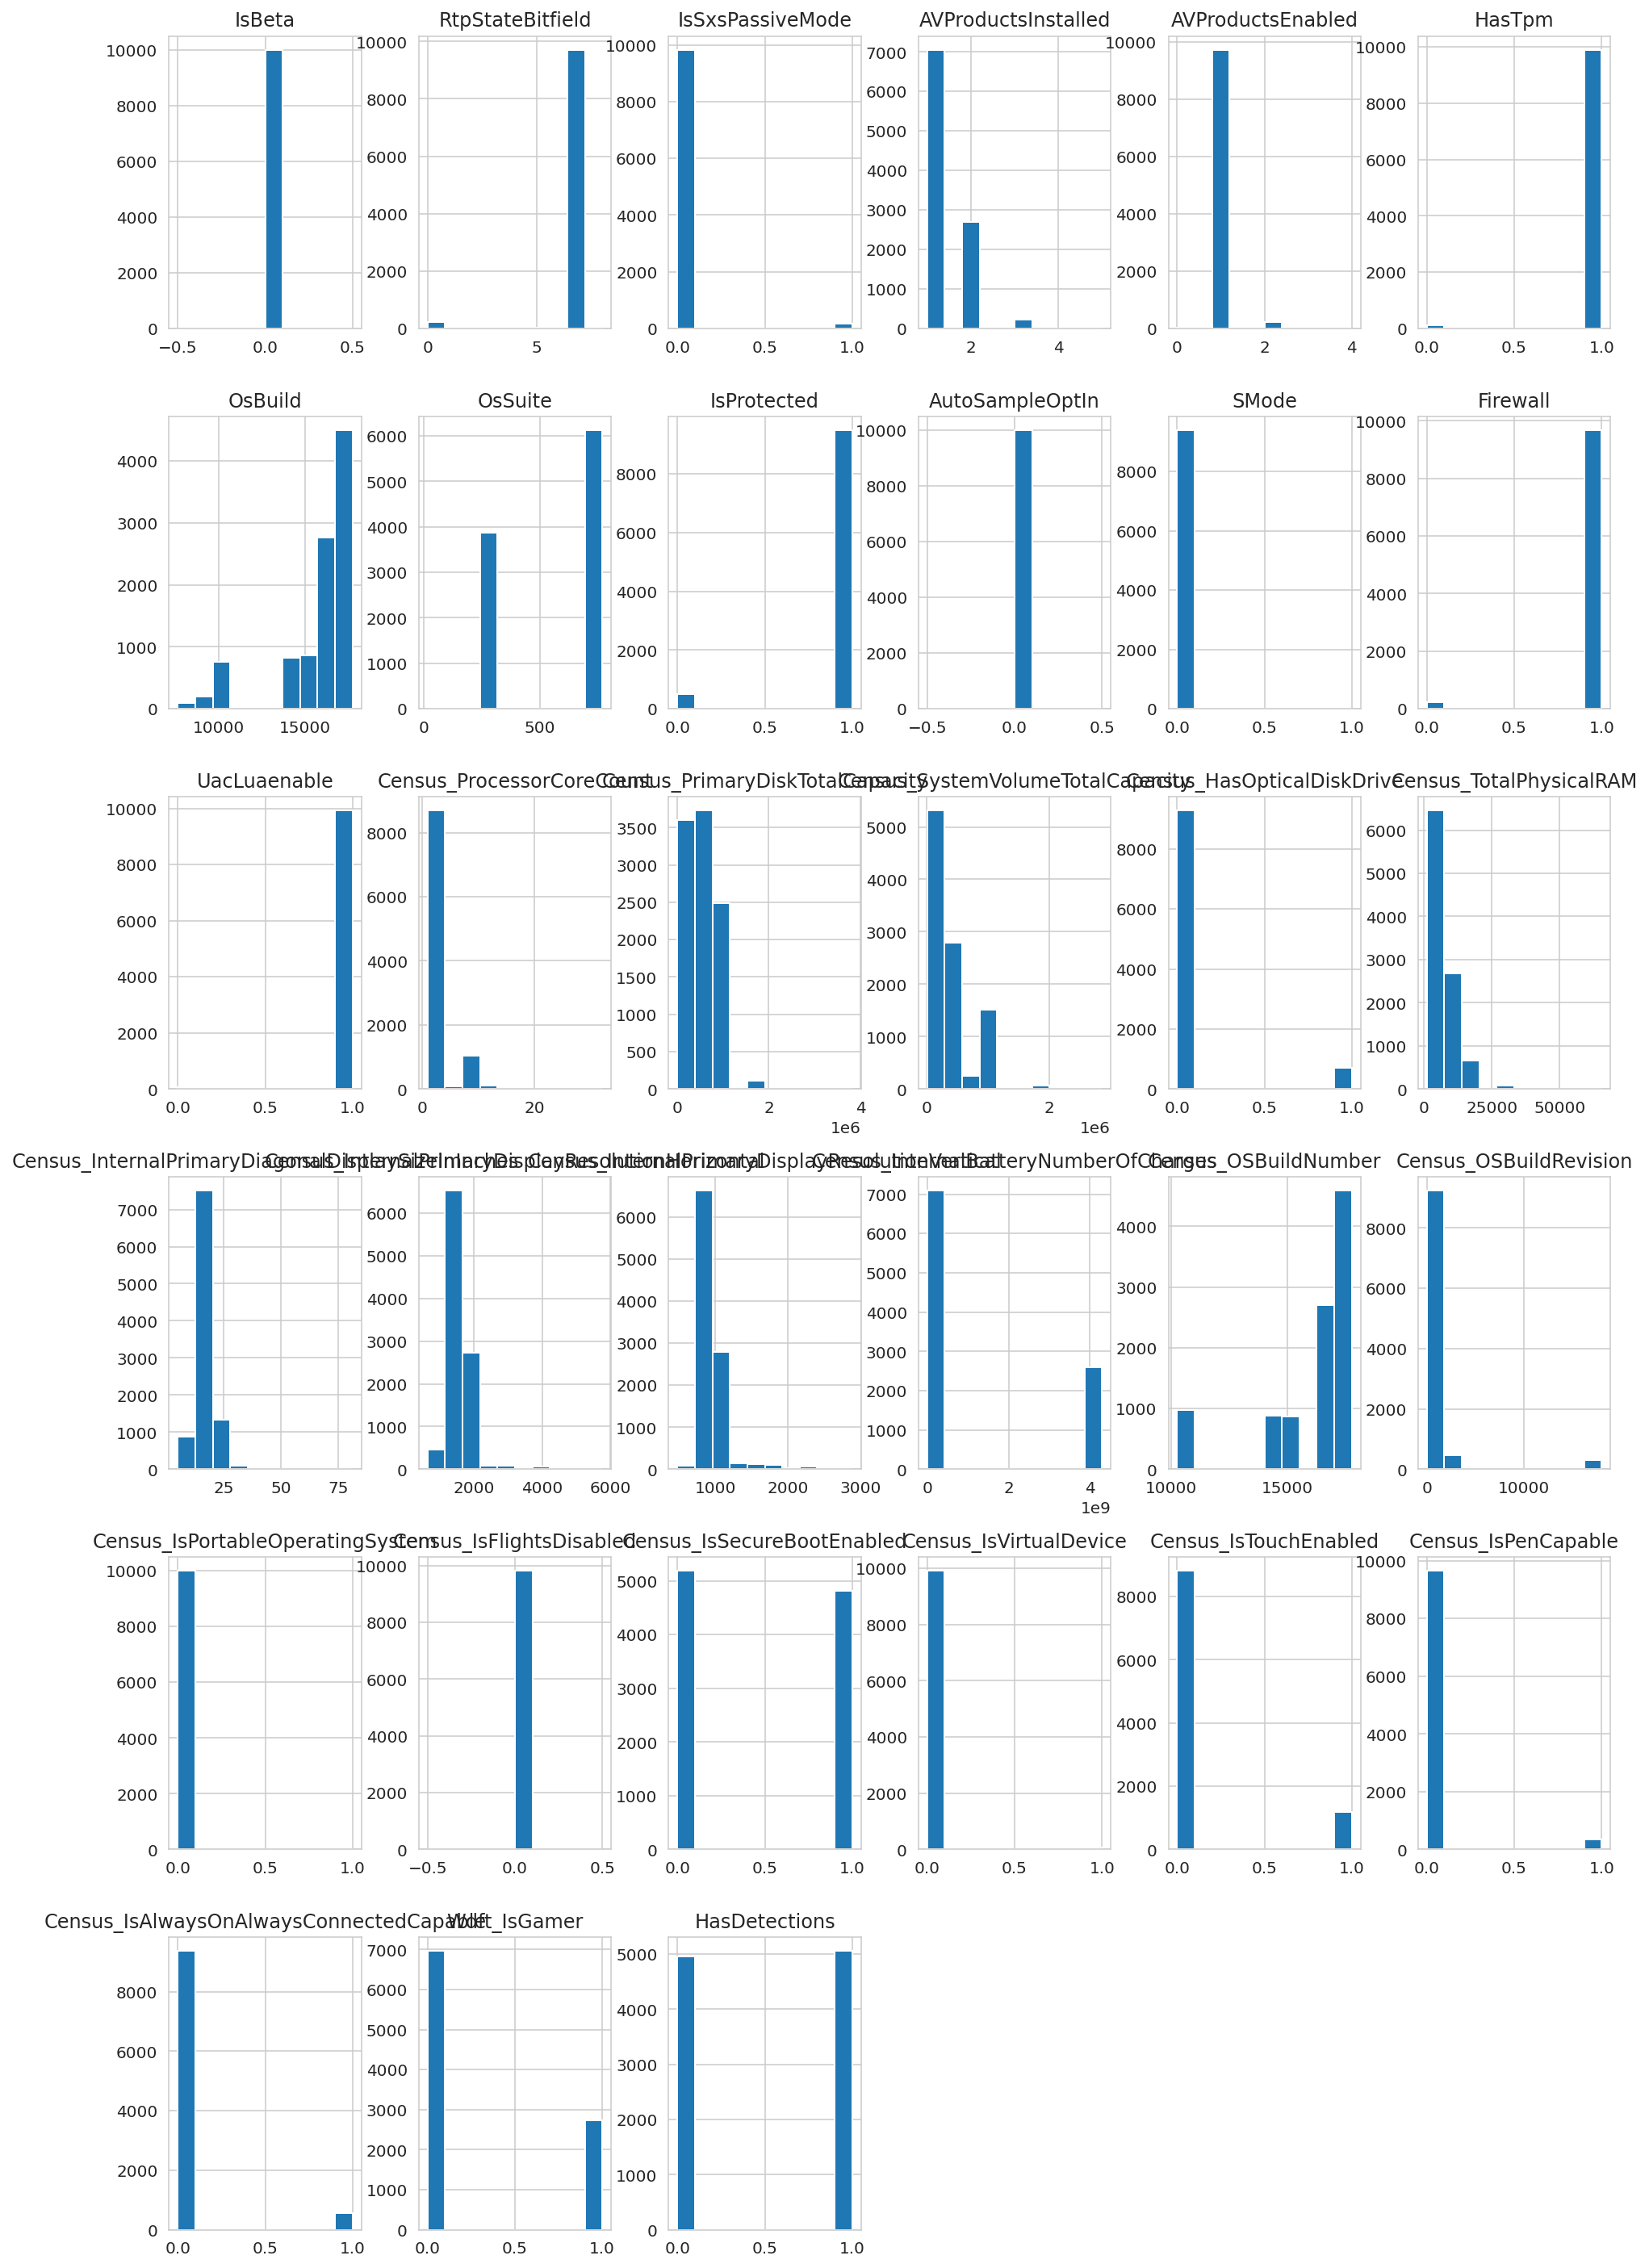

In [ ]:
# See the distribution of integer value to select the best filling null value
df_.hist(column=integer_columns,figsize=(16,25))
plt.tight_layout()# make space between them

In [ ]:
# Most of them have skew ,so it is better to use median rather than mean
# Add using get dummy to convert object columns

for column in df_.columns:
    if (df_[column].isnull().any()):
        if column in cateogry_columns:
            df_[column]=df_[column].replace(np.nan,0)
        else:
            df_[column]=df_[column].fillna(df_[column].median())
    if column in cateogry_columns:
        df_=pd.get_dummies(df_, columns=[column])

The shape of dataframe before cleansing:  (10000, 74)
The shape of dataframe after cleansing:  (10000, 12405)


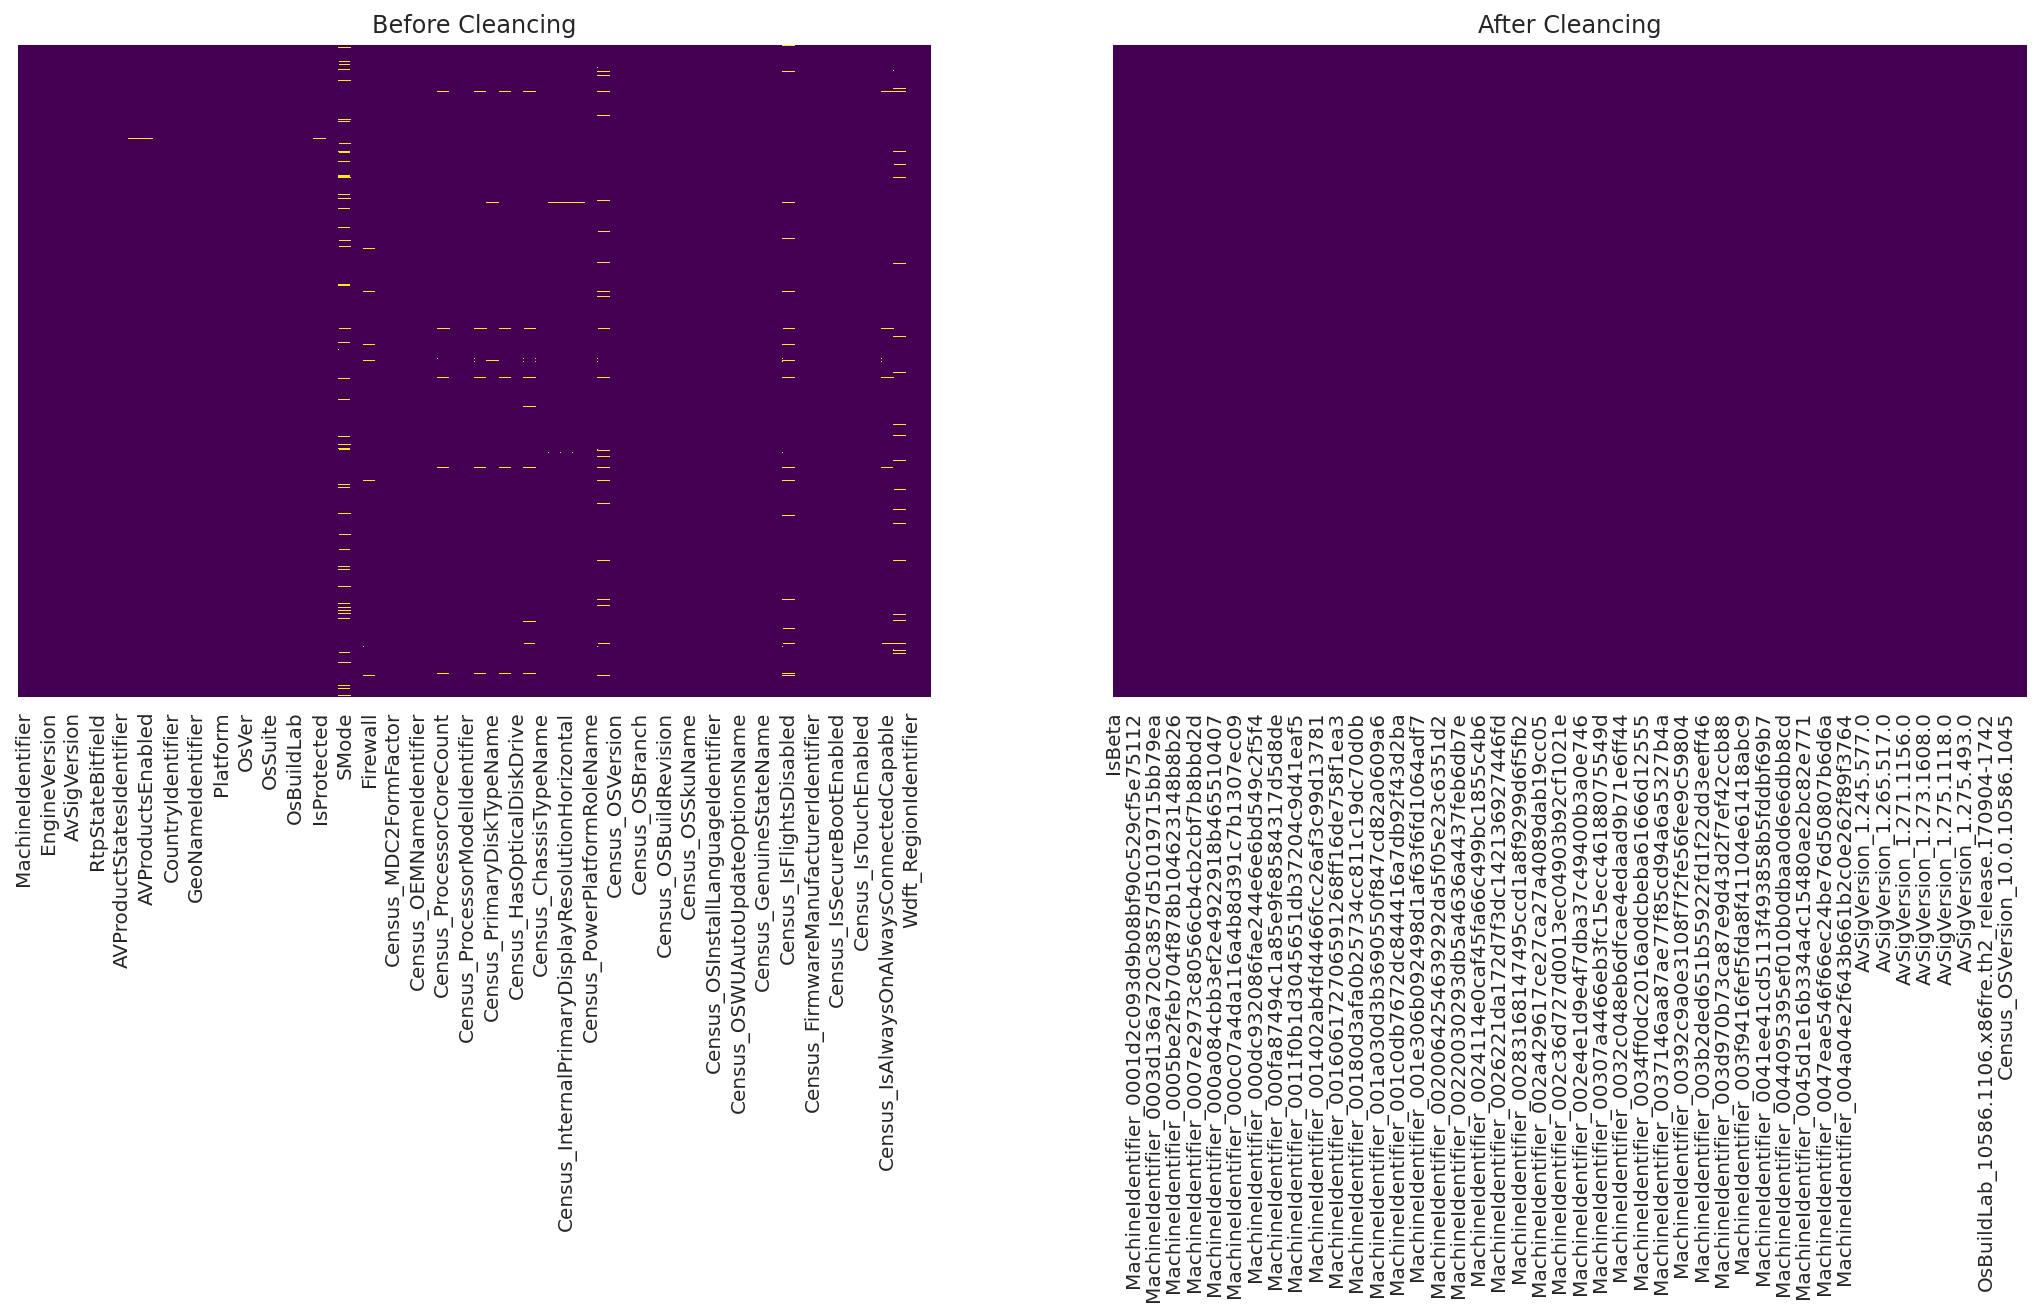

In [ ]:
print ('The shape of dataframe before cleansing: ',df.shape)
print ('The shape of dataframe after cleansing: ',df_.shape)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
# train data 
sns.heatmap(df.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Before Cleancing')

# test data
sns.heatmap(df_.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('After Cleancing');

 As you see, there is no nosiy in the second figer which means no missing value

## Filtering Features:

In [ ]:

# sign all features without the taregt to X and save the target in y
X_, y = df_.drop(columns=['HasDetections'],axis=1), df_[['HasDetections']]

In [ ]:

X_#features before scaler

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductsInstalled,AVProductsEnabled,HasTpm,OsBuild,OsSuite,IsProtected,AutoSampleOptIn,SMode,Firewall,UacLuaenable,Census_ProcessorCoreCount,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges,Census_OSBuildNumber,Census_OSBuildRevision,Census_IsPortableOperatingSystem,Census_IsFlightsDisabled,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,MachineIdentifier_0000028988387b115f69f31a3bf04f09,MachineIdentifier_000007535c3f730efa9ea0b7ef1bd645,MachineIdentifier_000007905a28d863f6d0d597892cd692,MachineIdentifier_00000b11598a75ea8ba1beea8459149f,MachineIdentifier_000014a5f00daa18e76b81417eeb99fc,MachineIdentifier_000016191b897145d069102325cab760,MachineIdentifier_0000161e8abf8d8b89c5ab8787fd712b,MachineIdentifier_000019515bc8f95851aff6de873405e8,...,Census_OSUILocaleIdentifier_4,Census_OSUILocaleIdentifier_5,Census_OSWUAutoUpdateOptionsName_AutoInstallAndRebootAtMaintenanceTime,Census_OSWUAutoUpdateOptionsName_DownloadNotify,Census_OSWUAutoUpdateOptionsName_FullAuto,Census_OSWUAutoUpdateOptionsName_Notify,Census_OSWUAutoUpdateOptionsName_Off,Census_OSWUAutoUpdateOptionsName_UNKNOWN,Census_GenuineStateName_INVALID_LICENSE,Census_GenuineStateName_IS_GENUINE,Census_GenuineStateName_OFFLINE,Census_GenuineStateName_UNKNOWN,Census_ActivationChannel_OEM:DM,Census_ActivationChannel_OEM:NONSLP,Census_ActivationChannel_Retail,Census_ActivationChannel_Retail:TB:Eval,Census_ActivationChannel_Volume:GVLK,Census_ActivationChannel_Volume:MAK,Census_FlightRing_Disabled,Census_FlightRing_NOT_SET,Census_FlightRing_RP,Census_FlightRing_Retail,Census_FlightRing_Unknown,Census_FlightRing_WIF,Census_FlightRing_WIS,Census_FirmwareManufacturerIdentifier_1,Census_FirmwareManufacturerIdentifier_2,Census_FirmwareManufacturerIdentifier_3,Census_FirmwareManufacturerIdentifier_4,Census_FirmwareManufacturerIdentifier_5,Census_FirmwareVersionIdentifier_1,Census_FirmwareVersionIdentifier_2,Census_FirmwareVersionIdentifier_3,Census_FirmwareVersionIdentifier_4,Census_FirmwareVersionIdentifier_5,Wdft_RegionIdentifier_1,Wdft_RegionIdentifier_2,Wdft_RegionIdentifier_3,Wdft_RegionIdentifier_4,Wdft_RegionIdentifier_5
0,0,7.0,0,1.0,1.0,1,17134,256,1.0,0,0.0,1.0,1.0,4.0,476940.0,299451.0,0,4096.0,18.9,1440.0,900.0,4.294967e+09,17134,165,0,0.0,0,0.0,0,0,0.0,0.0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
1,0,7.0,0,1.0,1.0,1,17134,256,1.0,0,0.0,1.0,1.0,4.0,476940.0,102385.0,0,4096.0,13.9,1366.0,768.0,1.000000e+00,17134,1,0,0.0,0,0.0,0,0,0.0,0.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,7.0,0,1.0,1.0,1,17134,768,1.0,0,0.0,1.0,1.0,4.0,114473.0,113907.0,0,4096.0,21.5,1920.0,1080.0,4.294967e+09,17134,165,0,0.0,0,0.0,0,0,0.0,0.0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,0,7.0,0,1.0,1.0,1,17134,256,1.0,0,0.0,1.0,1.0,4.0,238475.0,227116.0,0,4096.0,18.5,1366.0,768.0,4.294967e+09,17134,228,0,0.0,0,0.0,0,0,0.0,0.0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
4,0,7.0,0,1.0,1.0,1,17134,768,1.0,0,0.0,1.0,1.0,4.0,476940.0,101900.0,0,6144.0,14.0,1366.0,768.0,0.000000e+00,17134,191,0,0.0,0,0.0,0,0,0.0,0.0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

#### Using feature_importances_

In [ ]:
sc = MinMaxScaler()#Define scaler
X1 = sc.fit_transform(X_)#do fit
X1=pd.DataFrame(X1, columns=X_.columns)#create dataframe that contains features after scaler
X1

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductsInstalled,AVProductsEnabled,HasTpm,OsBuild,OsSuite,IsProtected,AutoSampleOptIn,SMode,Firewall,UacLuaenable,Census_ProcessorCoreCount,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges,Census_OSBuildNumber,Census_OSBuildRevision,Census_IsPortableOperatingSystem,Census_IsFlightsDisabled,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,MachineIdentifier_0000028988387b115f69f31a3bf04f09,MachineIdentifier_000007535c3f730efa9ea0b7ef1bd645,MachineIdentifier_000007905a28d863f6d0d597892cd692,MachineIdentifier_00000b11598a75ea8ba1beea8459149f,MachineIdentifier_000014a5f00daa18e76b81417eeb99fc,MachineIdentifier_000016191b897145d069102325cab760,MachineIdentifier_0000161e8abf8d8b89c5ab8787fd712b,MachineIdentifier_000019515bc8f95851aff6de873405e8,...,Census_OSUILocaleIdentifier_4,Census_OSUILocaleIdentifier_5,Census_OSWUAutoUpdateOptionsName_AutoInstallAndRebootAtMaintenanceTime,Census_OSWUAutoUpdateOptionsName_DownloadNotify,Census_OSWUAutoUpdateOptionsName_FullAuto,Census_OSWUAutoUpdateOptionsName_Notify,Census_OSWUAutoUpdateOptionsName_Off,Census_OSWUAutoUpdateOptionsName_UNKNOWN,Census_GenuineStateName_INVALID_LICENSE,Census_GenuineStateName_IS_GENUINE,Census_GenuineStateName_OFFLINE,Census_GenuineStateName_UNKNOWN,Census_ActivationChannel_OEM:DM,Census_ActivationChannel_OEM:NONSLP,Census_ActivationChannel_Retail,Census_ActivationChannel_Retail:TB:Eval,Census_ActivationChannel_Volume:GVLK,Census_ActivationChannel_Volume:MAK,Census_FlightRing_Disabled,Census_FlightRing_NOT_SET,Census_FlightRing_RP,Census_FlightRing_Retail,Census_FlightRing_Unknown,Census_FlightRing_WIF,Census_FlightRing_WIS,Census_FirmwareManufacturerIdentifier_1,Census_FirmwareManufacturerIdentifier_2,Census_FirmwareManufacturerIdentifier_3,Census_FirmwareManufacturerIdentifier_4,Census_FirmwareManufacturerIdentifier_5,Census_FirmwareVersionIdentifier_1,Census_FirmwareVersionIdentifier_2,Census_FirmwareVersionIdentifier_3,Census_FirmwareVersionIdentifier_4,Census_FirmwareVersionIdentifier_5,Wdft_RegionIdentifier_1,Wdft_RegionIdentifier_2,Wdft_RegionIdentifier_3,Wdft_RegionIdentifier_4,Wdft_RegionIdentifier_5
0,0.0,0.875,0.0,0.00,0.25,1.0,0.938565,0.319149,1.0,0.0,0.0,1.0,1.0,0.096774,0.122546,0.101510,0.0,0.047634,0.183246,0.156250,0.175,1.000000e+00,0.916999,0.009179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.875,0.0,0.00,0.25,1.0,0.938565,0.319149,1.0,0.0,0.0,1.0,1.0,0.096774,0.122546,0.032368,0.0,0.047634,0.117801,0.141797,0.120,2.328306e-10,0.916999,0.000056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.875,0.0,0.00,0.25,1.0,0.938565,1.000000,1.0,0.0,0.0,1.0,1.0,0.096774,0.027280,0.036411,0.0,0.047634,0.217277,0.250000,0.250,1.000000e+00,0.916999,0.009179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.875,0.0,0.00,0.25,1.0,0.938565,0.319149,1.0,0.0,0.0,1.0,1.0,0.096774,0.059871,0.076131,0.0,0.047634,0.178010,0.141797,0.120,1.000000e+00,0.916999,0.012684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0

In [ ]:
model = ExtraTreesClassifier()#Define the model
model.fit(X1, y)#Do fit
dfscores = pd.DataFrame(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
feat_importances = pd.Series(model.feature_importances_, index=X1.columns)#create dataframe that contains importance features


In [ ]:
dfcolumns = pd.DataFrame(X1.columns)# create dataframe that contains the columns' name
featureScores = pd.concat([dfcolumns,dfscores],axis=1)# connect the two dataframe togather to the nr=ew dataframe
featureScores.columns = ['features','feature_importances']  #naming the dataframe columns
featureScores=featureScores.nlargest(10,'feature_importances')  #print 10 best features
featureScores=featureScores.sort_values(by='feature_importances', ascending=True, inplace=False)# sort the values
featureScores# Display the dataframe that contains the impotance features with thier scores

,features,feature_importances
31,Wdft_IsGamer,0.008245
20,Census_InternalPrimaryDisplayResolutionVertical,0.009662
13,Census_ProcessorCoreCount,0.010301
19,Census_InternalPrimaryDisplayResolutionHorizontal,0.010400
11789,AVProductStatesIdentifier_1,0.010664
23,Census_OSBuildRevision,0.011469
17,Census_TotalPhysicalRAM,0.012121
18,Census_InternalPrimaryDiagonalDisplaySizeInInches,0.013186
14,Census_PrimaryDiskTotalCapacity,0.013392
15,Census_SystemVolumeTotalCapacity,0.016493


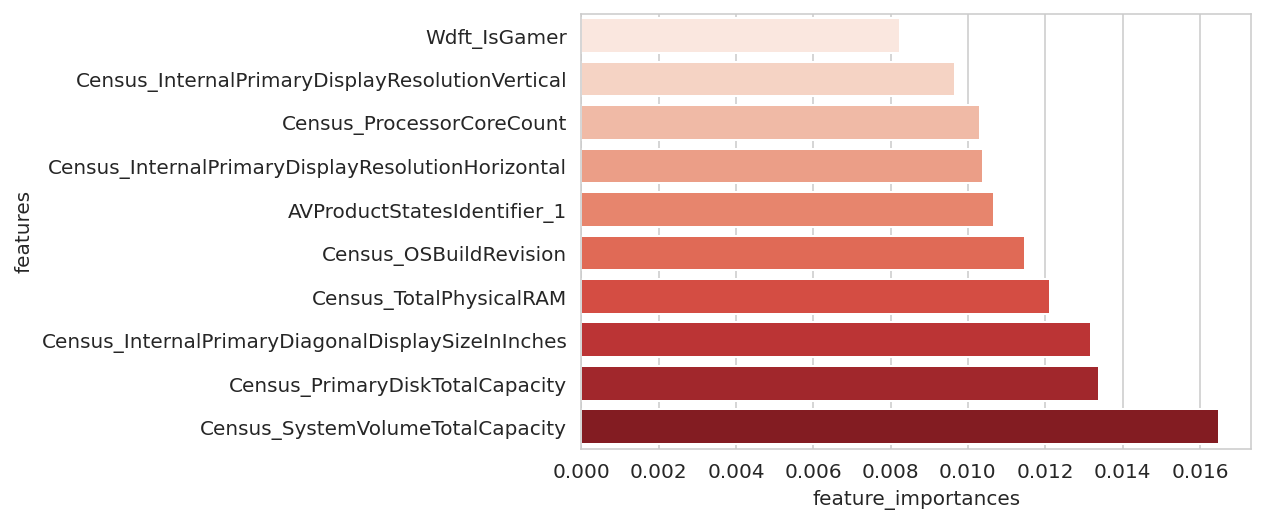

In [ ]:
# plot the result
sns.barplot(x='feature_importances',y='features',data=featureScores,palette='Reds');


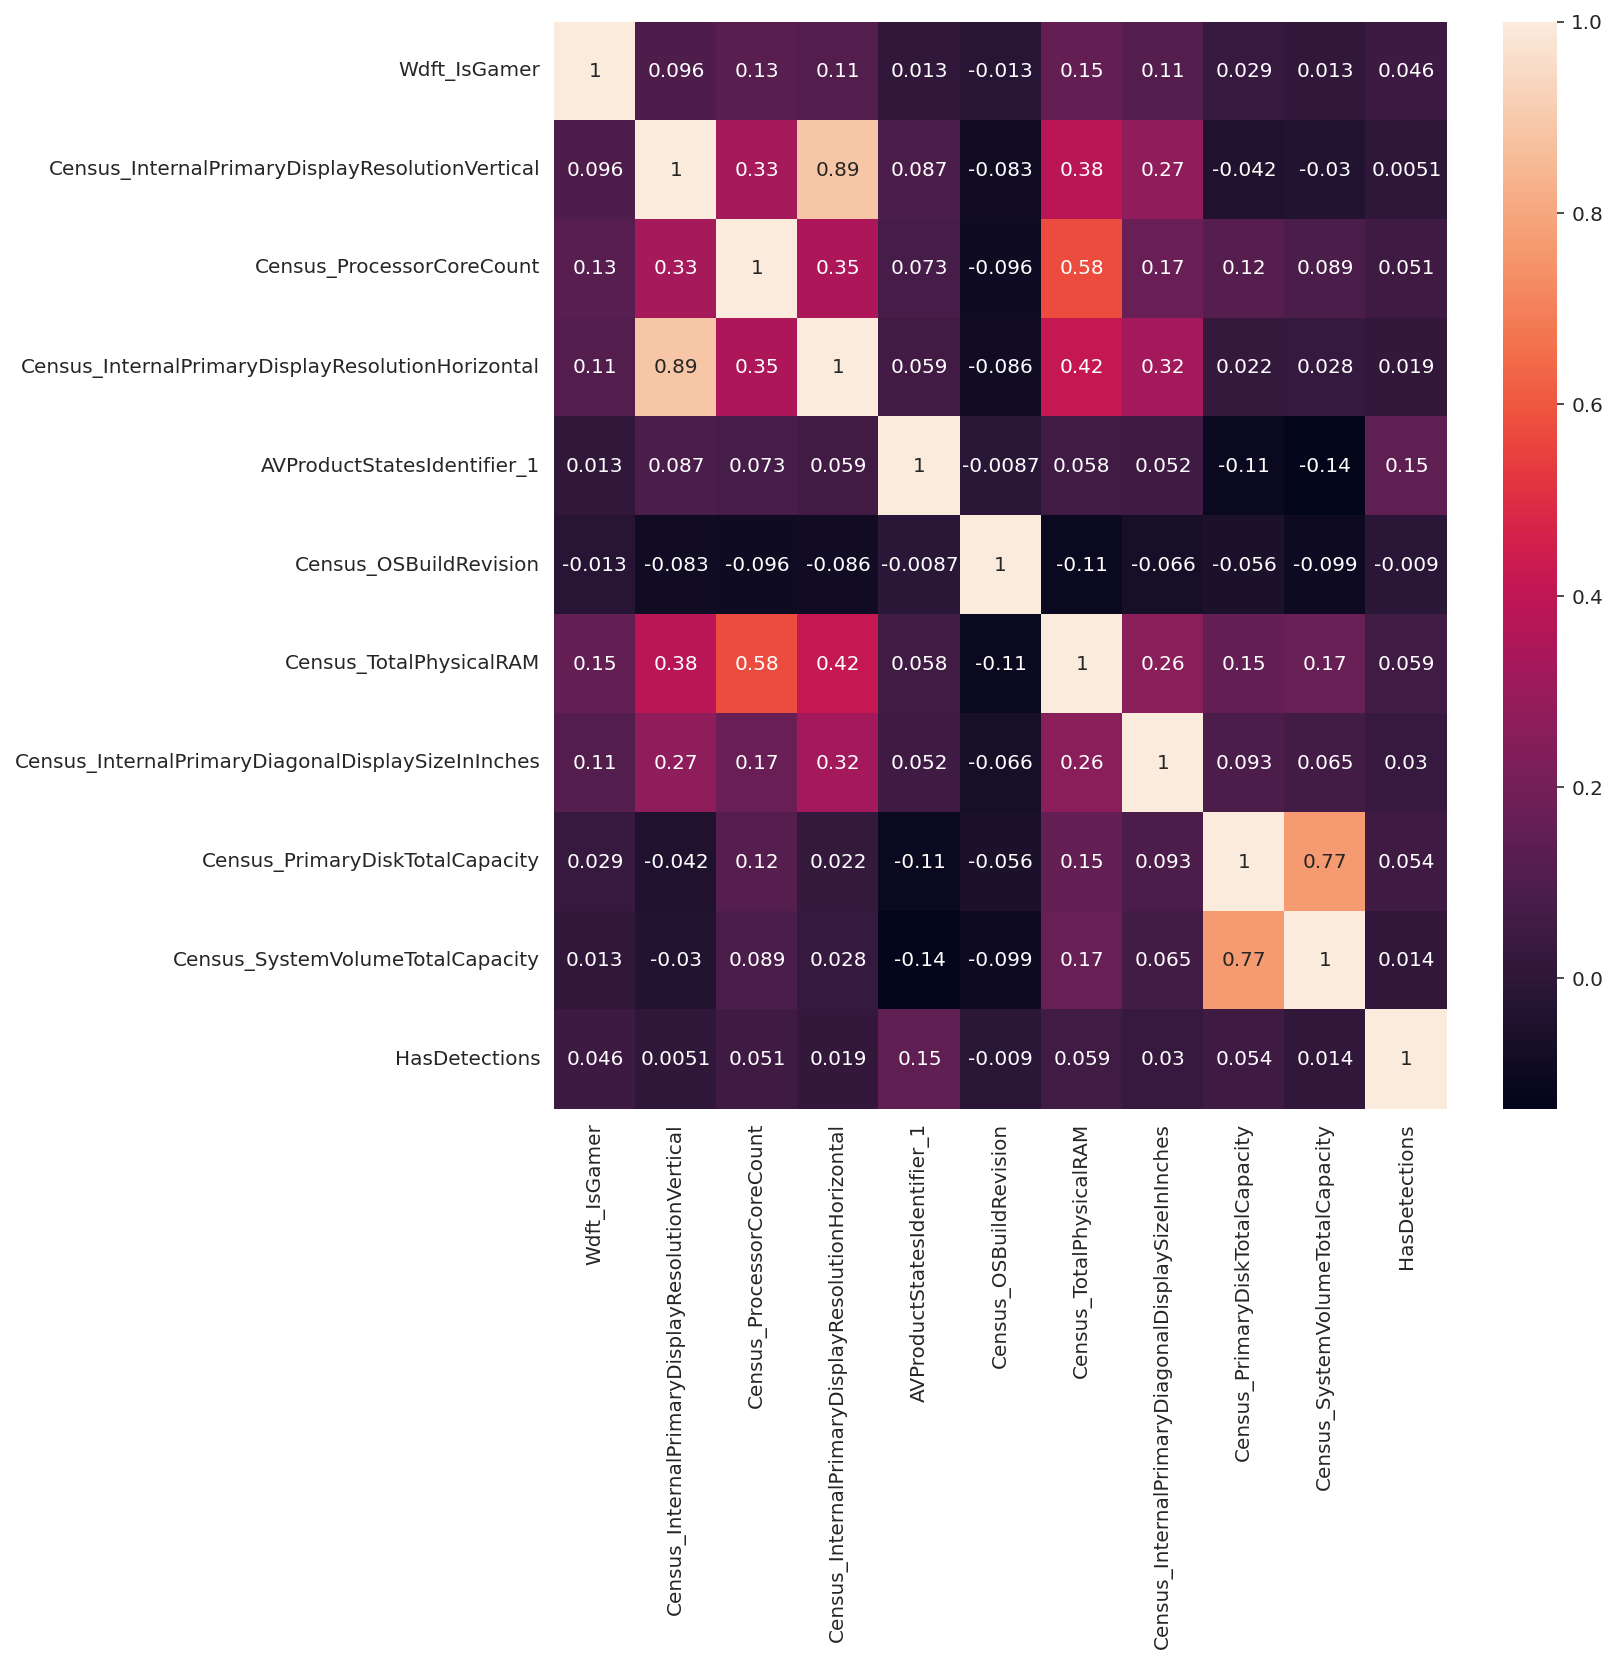

In [ ]:


# plot heatmap to see the relationshipe between features and target
f_method=X1[featureScores['features']]
f_method['HasDetections']=df_['HasDetections']
plt.figure(figsize=(10,10))
sns.heatmap(f_method.corr(), annot=True);
plt.show()

Maybe this method is good almost features have positive relationshipe with the target




#### - Using bestfeatures

In [ ]:

X_, y = df_.drop(columns=['HasDetections'],axis=1), df_[['HasDetections']]
sc = MinMaxScaler()#Define scaler 
X2 = sc.fit_transform(X_)#fit
X2=pd.DataFrame(X2, columns=X_.columns)#create dataframe that contains features after scaler
y2=df_[['HasDetections']]#target

In [ ]:
#X2, y = df_.drop(columns=['HasDetections'],axis=1), df_['HasDetections']
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit_2 = bestfeatures.fit(X2,y2)
dfscores_2 = pd.DataFrame(fit_2.scores_)
dfcolumns_2 = pd.DataFrame(X2.columns)
#concat two dataframes for better visualization 
featureScores_2 = pd.concat([dfcolumns_2,dfscores_2],axis=1)
featureScores_2.columns = ['best_features','Score']  #naming the dataframe columns
featureScores_2=featureScores_2.nlargest(10,'Score')  #print 10 best features
featureScores_2
featureScores_2=featureScores_2.sort_values(by='Score', ascending=True, inplace=False)
featureScores_2# Display the dataframe that contains the best features with thier scores


,best_features,Score
27,Census_IsVirtualDevice,33.905727
10063,EngineVersion_1.1.14901.4,34.304807
10094,AppVersion_4.14.17639.18041,37.636902
10095,AppVersion_4.16.17656.18052,37.827082
10061,EngineVersion_1.1.14800.3,38.743909
10066,EngineVersion_1.1.15100.1,38.972390
3,AVProductsInstalled,40.065285
11790,AVProductStatesIdentifier_2,55.686235
11789,AVProductStatesIdentifier_1,72.185624
11793,AVProductStatesIdentifier_5,88.735898


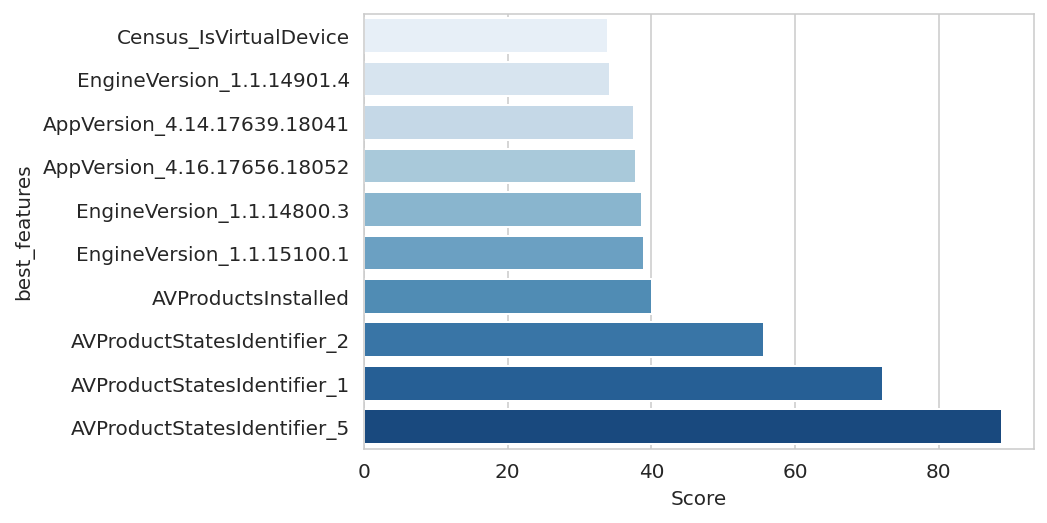

In [ ]:
#plot the result 
#sns.scatterplot(x='Score',y='best_features',data=featureScores_2,palette='Blues');
sns.barplot(x='Score',y='best_features',data=featureScores_2,palette='Blues');


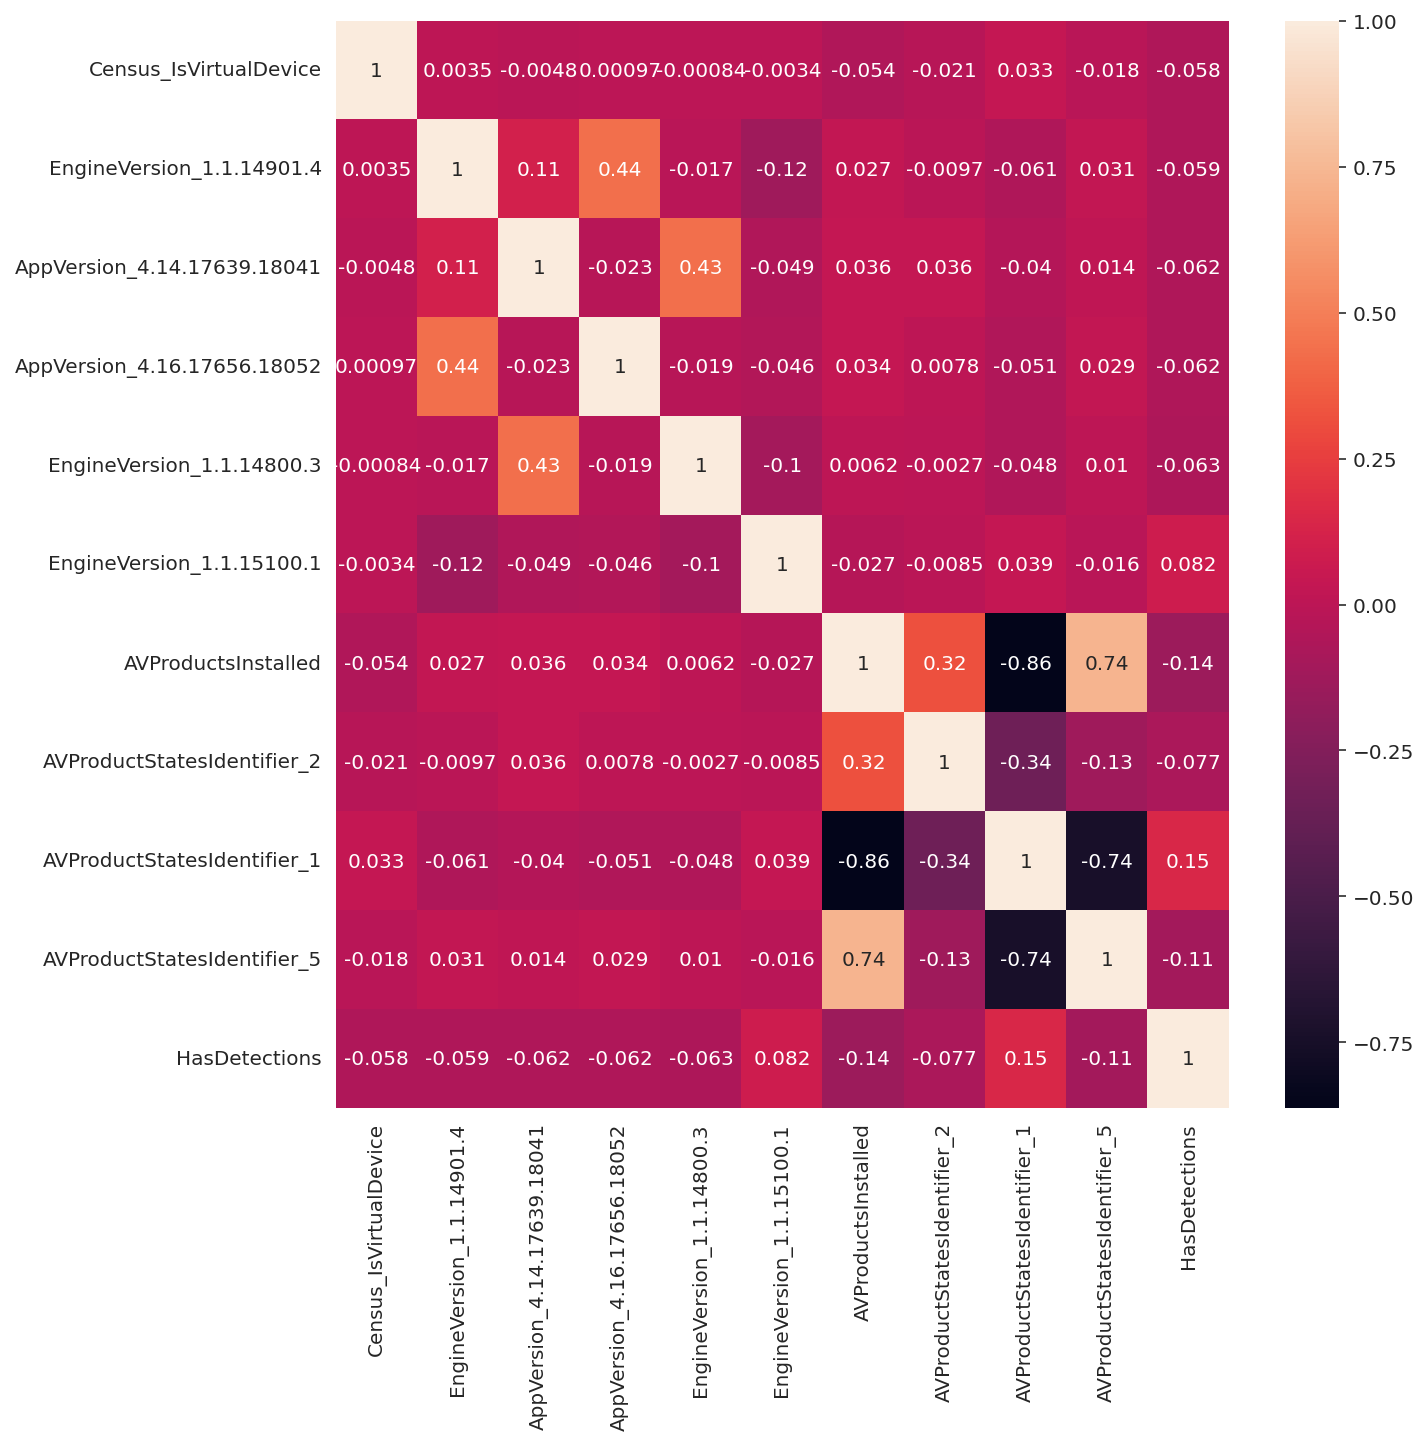

In [ ]:


# plot heatmap to see the relationshipe between features and target
S_method=X_[featureScores_2['best_features']]
S_method['HasDetections']=df_['HasDetections']
plt.figure(figsize=(10,10))
sns.heatmap(S_method.corr(), annot=True)
plt.show()

As you see, nearly all features have a negative relationshipe with the target

#### - Using RandomForest

In [ ]:
# we define 3 functions, each of them do random forest but in different strategies
#1- first one : by using only impotance features 'rf.feature_importances_'
def imp_df(column_names, importances):# send the name of columns and feature_importances_
    data = {
        'Feature': column_names,# save the name of columns
        'Importance': importances,# save the impotances
    }
    
    # create new dataframe that contains two columns ['Feature','Importance']
    # assign 'Feature' as an index
    df = pd.DataFrame(data)\
        .set_index('Feature')\
        .sort_values('Importance', ascending=False)# sort 'Importance' for high prority to low

    return df.head(10) # return the dataframe

X_, y3 = df_.drop(columns=['HasDetections'],axis=1), df_['HasDetections']
sc = MinMaxScaler()
X3 = sc.fit_transform(X_)
X3=pd.DataFrame(X3, columns=X_.columns)


rf = RandomForestRegressor(n_estimators=10, random_state=0).fit(X3, y3)# random forest for X_train and y_train

print('Random Forest Feature Importances:')
RF_Importances=imp_df(X3.columns, rf.feature_importances_)# call the first function and print the result
RF_Importances=RF_Importances.sort_values(by='Importance', ascending=True, inplace=False)
RF_Importances

Random Forest Feature Importances:


,Importance
Feature,
EngineVersion_1.1.15100.1,0.008491
Census_InternalPrimaryDisplayResolutionVertical,0.009444
Census_InternalPrimaryDisplayResolutionHorizontal,0.010300
Census_ProcessorCoreCount,0.013302
Census_PrimaryDiskTotalCapacity,0.019741
AVProductStatesIdentifier_1,0.021204
Census_TotalPhysicalRAM,0.021490
Census_OSBuildRevision,0.033685
Census_InternalPrimaryDiagonalDisplaySizeInInches,0.040232


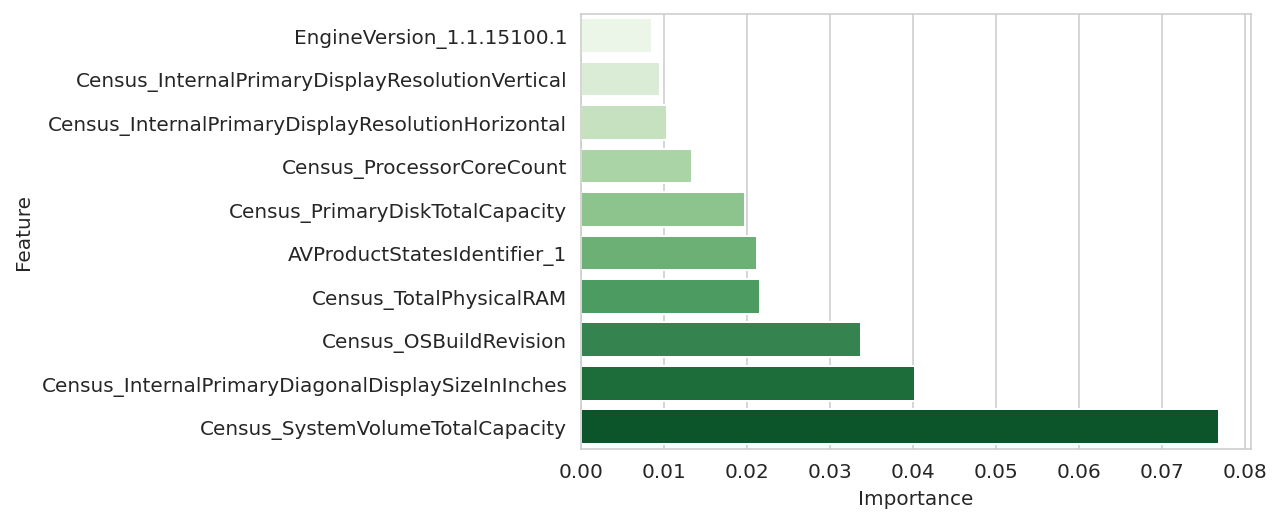

In [ ]:
#plot the result 
sns.barplot(x='Importance',y=RF_Importances.index,data=RF_Importances,palette='Greens');

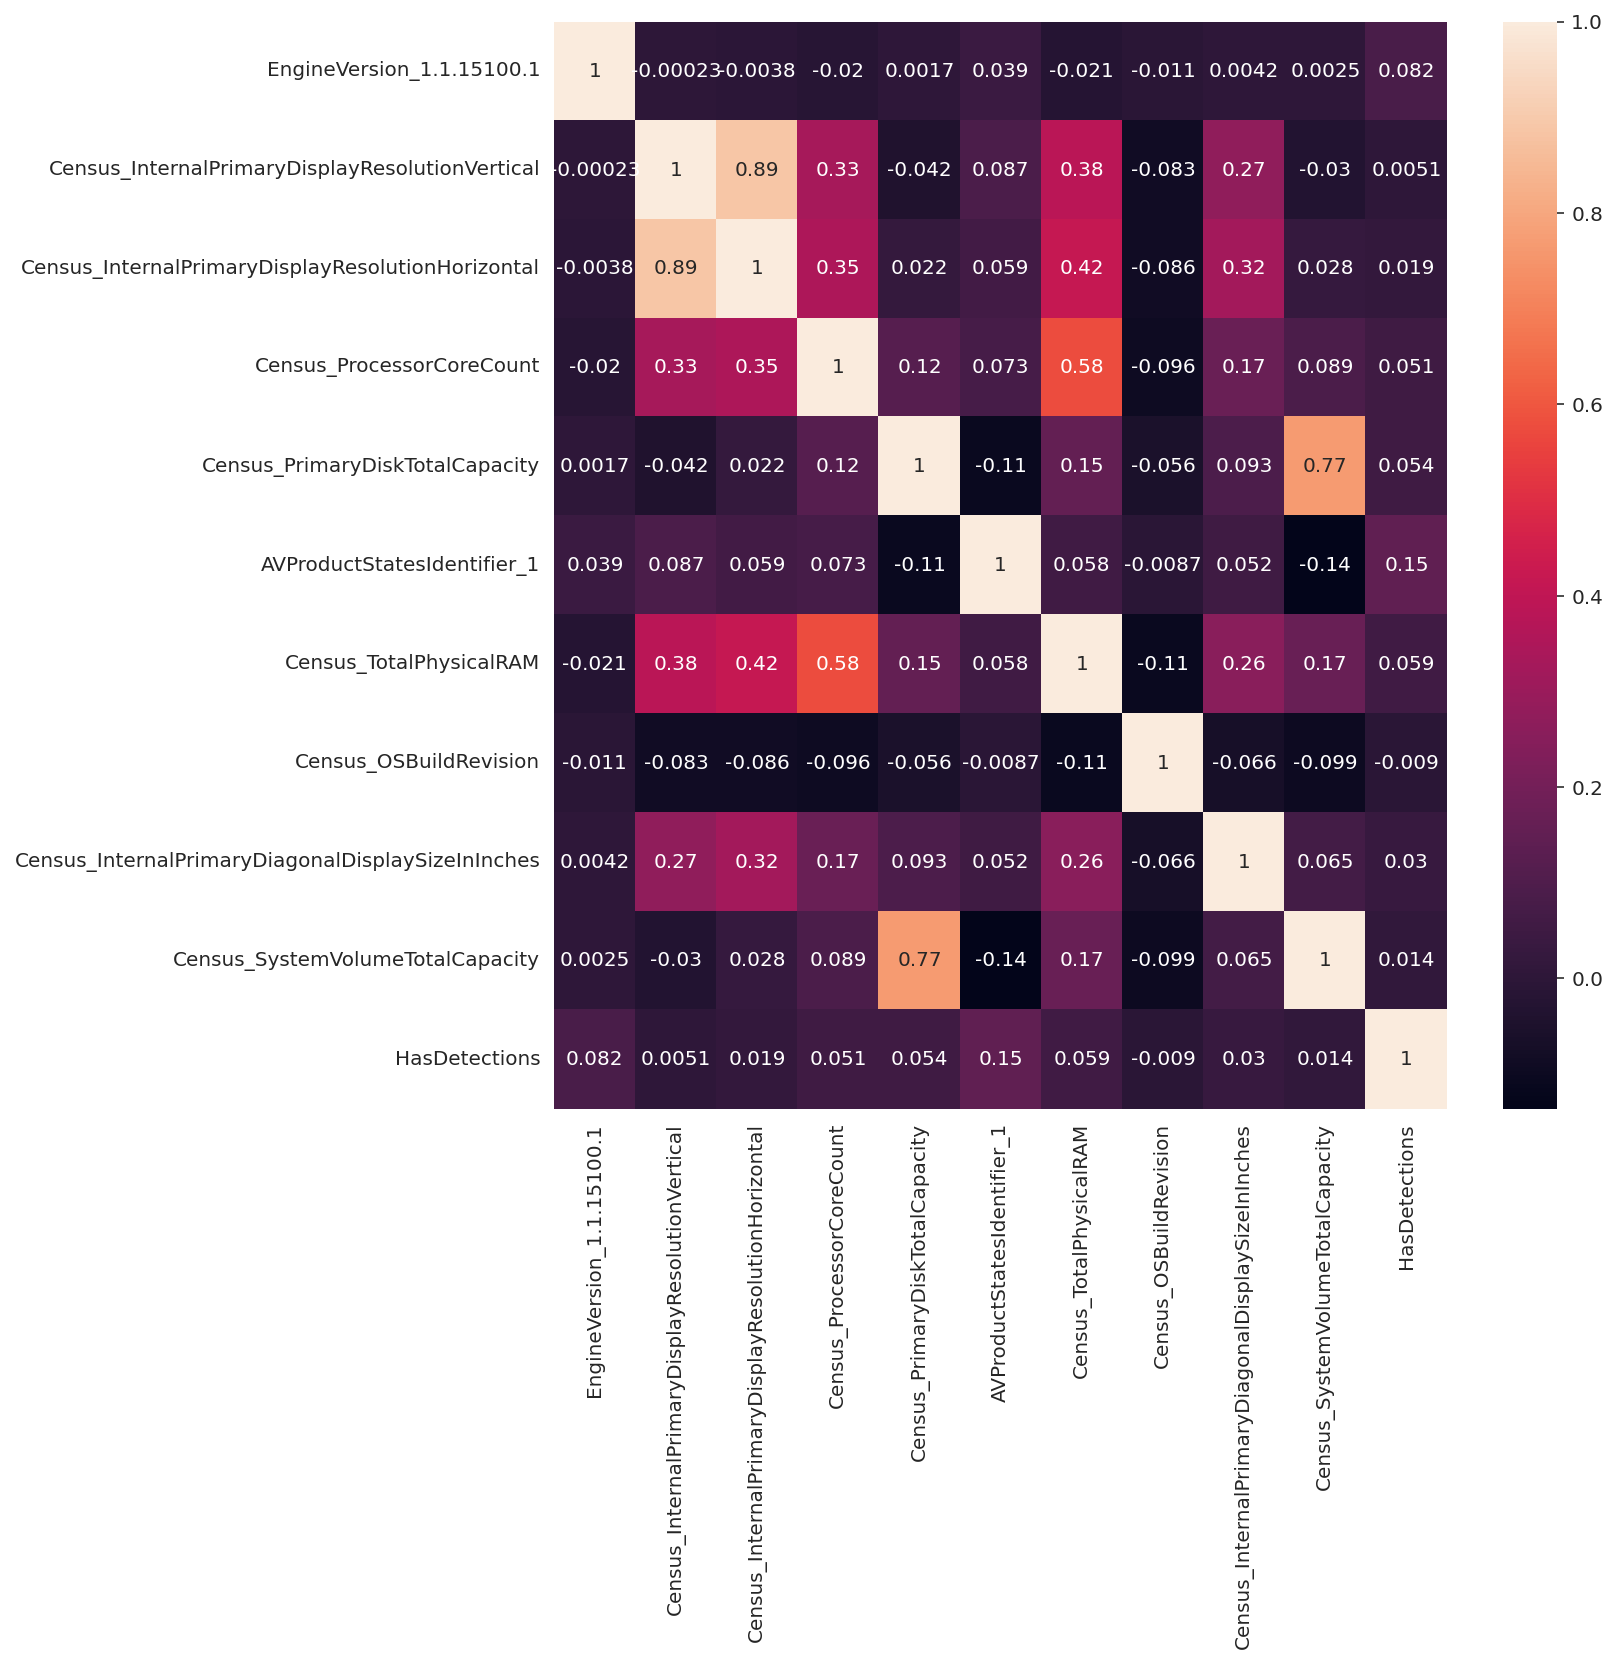

In [ ]:
# plot heatmap to see the relationshipe between features and target
Th_method=X_[RF_Importances.index]#Select feartures after scaling
Th_method['HasDetections']=df['HasDetections']
plt.figure(figsize=(10,10))
sns.heatmap(Th_method.corr(), annot=True)
plt.show()

This method is good because almost features have positive relationshipe with the target 

## - Modeling



## 1- LogisticRegression Model
I will apply for all three methods then, I will select the best method to use it in different models

#### A) First method

In [ ]:
X1_lr=df_[featureScores['features']]# assign the features to X1
y1_lr=df_[['HasDetections']]#target

In [ ]:
x1_train_lr, x1_test_lr, y1_train_lr, y1_test_lr = train_test_split(X1_lr, y1_lr ,test_size=0.1, random_state=0)#Do split

In [ ]:
# Instantiate pipeline object.
lr_pipe1 = Pipeline([
    ('scaler', StandardScaler()),#did standerisation to scale the value of features 
    ('logreg', LogisticRegression(solver='liblinear'))# using LogisticRegression model
])

In [ ]:
# Define dictionary of hyperparameters.
lrpipe1_params = {'scaler__with_mean': [True, False], 
                 'scaler__with_std': [True, False],
                 'logreg__C': [0.1, 0.2,0.3], 
                 'logreg__fit_intercept': [True, False],
                 'logreg__penalty': ['l1', 'l2']}

In [ ]:
# Instantiate our GridSearchCV object.
lrpipe1_gridsearch = GridSearchCV(lr_pipe1, # What is the model we want to fit?
                                 lrpipe1_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 verbose=0)

In [ ]:
lrpipe1_gridsearch.fit(x1_train_lr, y1_train_lr)# do fit for train data

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid={'logreg__C': [0.1, 0.2, 0.3],
                         'logreg__fit_intercept': [True, False],
                         'logreg__penalty': ['l1', 'l2'],
                         'scaler__with_mean': [True, False],
                         'scaler__with_std': [True, False]})

In [251]:
score_train_lr1=lrpipe1_gridsearch.best_score_#show the best score
print(cl("Logistic_Regression Train",color='red',attrs = ['bold']), score_train_lr1.round(3))

Logistic_Regression Train 0.581


In [ ]:
lrpipe1_gridsearch.best_estimator_#whta is the best pramater that model used??

Pipeline(steps=[('scaler', StandardScaler(with_mean=False, with_std=False)),
                ('logreg',
                 LogisticRegression(C=0.3, penalty='l1', solver='liblinear'))])

In [ ]:
pred_train_lr1 = lrpipe1_gridsearch.predict(x1_train_lr)# predicting values in train_data
pred_test_lr1 = lrpipe1_gridsearch.predict(x1_test_lr)# predicting values in test_data

[[2104 2335]
 [1449 3112]]


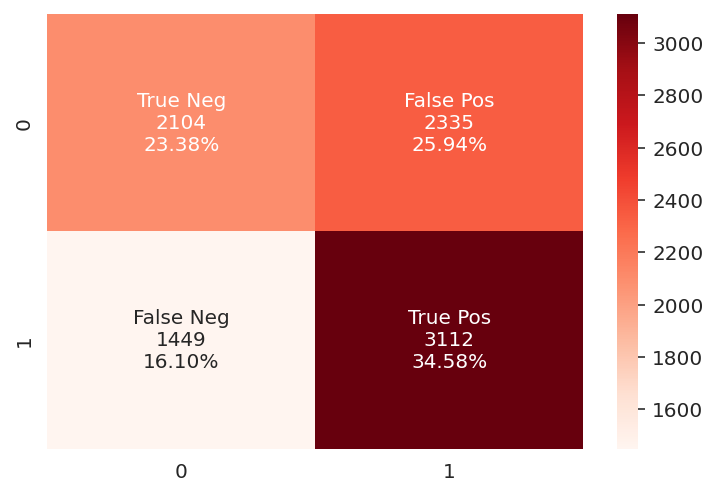

In [ ]:
confusion_matrix = metrics.confusion_matrix(y1_train_lr,pred_train_lr1)#cofusion matrex
print(confusion_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Reds')

In [ ]:
print(classification_report(y1_train_lr,pred_train_lr1))

              precision    recall  f1-score   support

           0       0.59      0.47      0.53      4439
           1       0.57      0.68      0.62      4561

    accuracy                           0.58      9000
   macro avg       0.58      0.58      0.57      9000
weighted avg       0.58      0.58      0.57      9000



In [250]:
preba_lr1=lrpipe1_gridsearch.predict_proba(x1_test_lr)#probability
score_lr1=lrpipe1_gridsearch.score(x1_test_lr, y1_test_lr)#score
print(cl("Logistic_Regression Test",color='red',attrs = ['bold']), score_lr1.round(3))#score of test

Logistic_Regression Test 0.593


In [249]:
lr_a1 = roc_auc_score(pred_test_lr1,y1_test_lr)
print(cl('roc_auc_score is:',color='red',attrs=['bold']), round(lr_a1*100,2))#calculate the percentage of accuracy

roc_auc_score is: 60.05


In [ ]:
test_1r1=y1_test_lr.copy()#create dataframe to plot the result
test_1r1['prediction']=pred_test_lr1

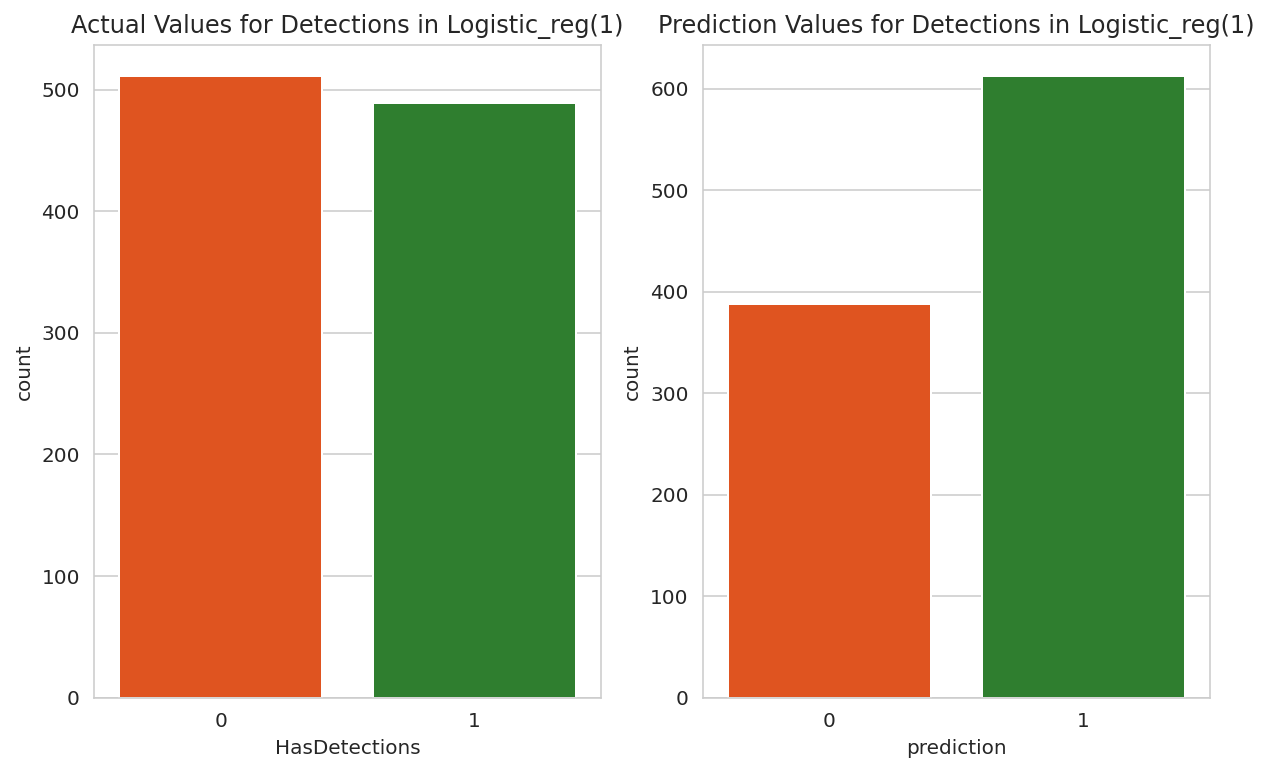

In [ ]:
#plot the true and prediction
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 6))

sns.countplot(x=test_1r1['HasDetections'], data=test_1r1,palette=['orangered',"forestgreen"],ax=ax[0])
ax[0].set_title('Actual Values for Detections in Logistic_reg(1)')
sns.countplot(x=test_1r1['prediction'], data=test_1r1,palette=['orangered',"forestgreen"], ax=ax[1])
ax[1].set_title('Prediction Values for Detections in Logistic_reg(1)')


plt.show()

As you see the score of the model not good

#### B) Second method

In [ ]:
X2_lr=df_[featureScores_2['best_features']]# assign the features to X2
y2_lr=df_[['HasDetections']]

In [ ]:
x2_train_lr, x2_test_lr, y2_train_lr, y2_test_lr = train_test_split(X2_lr, y2_lr ,test_size=0.1, random_state=0)

In [ ]:
# Instantiate pipeline object.
lr2_pipe = Pipeline([
    ('scaler', StandardScaler()),#did standerisation to scale the value of features 
    ('logreg', LogisticRegression(solver='liblinear'))# using LogisticRegression model
])

In [ ]:
# Define dictionary of hyperparameters.
lr2pipe_params = {'scaler__with_mean': [True, False], 
                 'scaler__with_std': [True, False],
                 'logreg__C': [0.1, 0.2,0.3], 
                 'logreg__fit_intercept': [True, False],
                 'logreg__penalty': ['l1', 'l2']}

In [ ]:
# Instantiate our GridSearchCV object.
lr2pipe_gridsearch = GridSearchCV(lr2_pipe, # What is the model we want to fit?
                                 lr2pipe_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 verbose=0)

In [ ]:
lr2pipe_gridsearch.fit(x2_train_lr, y2_train_lr)# do fit for train data

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid={'logreg__C': [0.1, 0.2, 0.3],
                         'logreg__fit_intercept': [True, False],
                         'logreg__penalty': ['l1', 'l2'],
                         'scaler__with_mean': [True, False],
                         'scaler__with_std': [True, False]})

In [248]:
score_train_lr2=lr2pipe_gridsearch.best_score_#show the best score
print(cl("Logistic_Regression Train",color='red',attrs = ['bold']), score_train_lr2.round(3))

Logistic_Regression Train 0.584


In [ ]:
lr2pipe_gridsearch.best_estimator_#whta is the best pramater that model used??

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(C=0.1, fit_intercept=False, penalty='l1',
                                    solver='liblinear'))])

In [ ]:

pred_train_lr2 = lr2pipe_gridsearch.predict(x2_train_lr)# predicting values in train_data
pred_test_lr2= lr2pipe_gridsearch.predict(x2_test_lr)# predicting values in test_data

[[1974 2465]
 [1275 3286]]


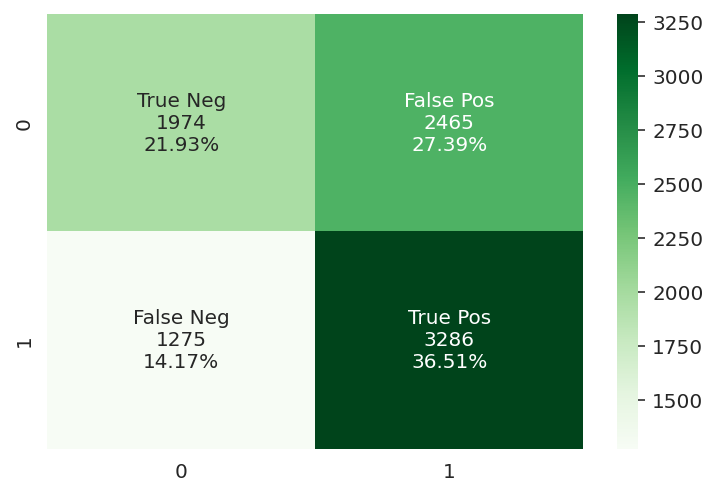

In [ ]:
confusion_matrix2 = metrics.confusion_matrix(y2_train_lr,pred_train_lr2)#cofusion matrex
print(confusion_matrix2)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix2.flatten()/np.sum(confusion_matrix2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix2, annot=labels, fmt='', cmap='Greens')

In [ ]:
print(classification_report(y2_train_lr,pred_train_lr2))

              precision    recall  f1-score   support

           0       0.61      0.44      0.51      4439
           1       0.57      0.72      0.64      4561

    accuracy                           0.58      9000
   macro avg       0.59      0.58      0.58      9000
weighted avg       0.59      0.58      0.58      9000



In [247]:
preba_lr2=lr2pipe_gridsearch.predict_proba(x2_test_lr)# calculate the probability
score_lr2=lr2pipe_gridsearch.score(x2_test_lr, y2_test_lr)# score the test
print(cl("Logistic_Regression Test",color='red',attrs = ['bold']), score_lr2.round(3))

Logistic_Regression Test 0.599


In [246]:
lr_a2 = roc_auc_score(pred_test_lr2,y2_test_lr)
print(cl('roc_auc_score is:',color='red',attrs=['bold']), round(lr_a2*100,2))#calculate the precentage of accuracy

roc_auc_score is: 61.28


In [ ]:
test_1r2=y2_test_lr.copy()#create dataframe to plot the result
test_1r2['prediction']=pred_test_lr2

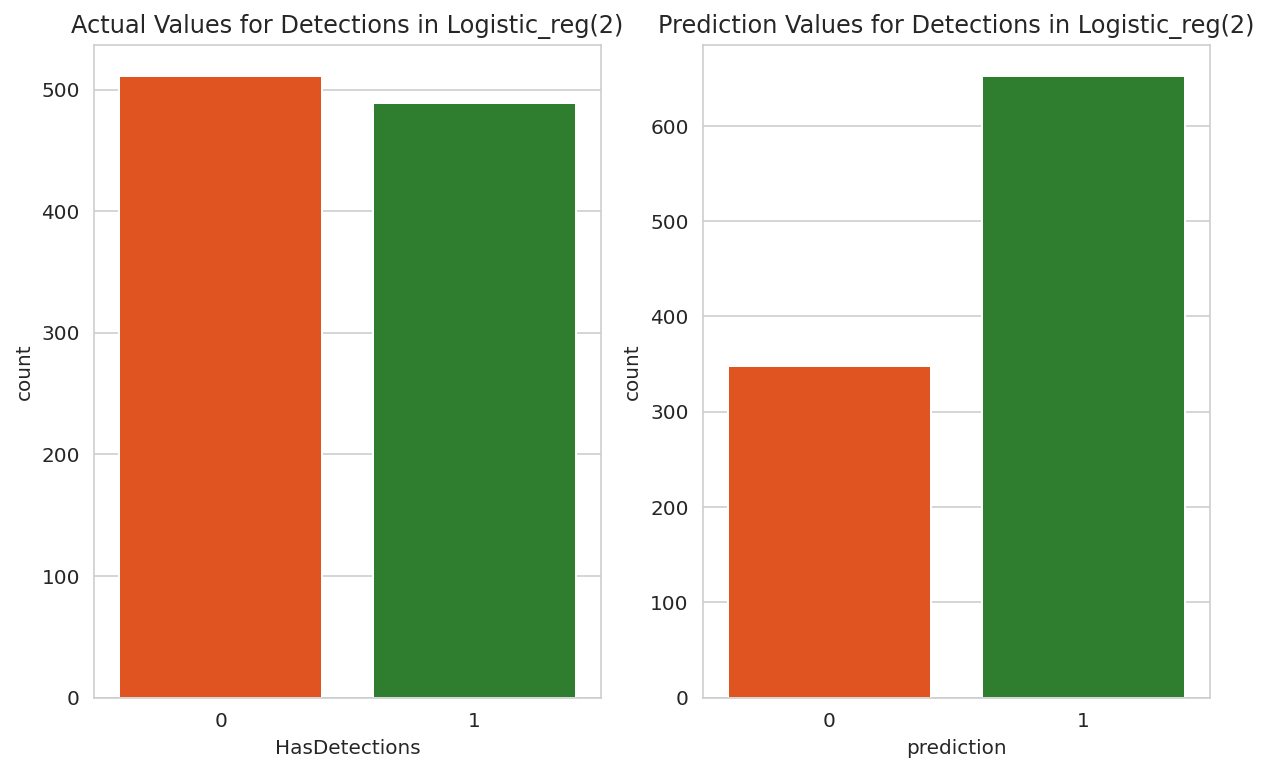

In [ ]:
#plot the true and prediction
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 6))

sns.countplot(x=test_1r2['HasDetections'], data=test_1r2,palette=['orangered',"forestgreen"],ax=ax[0])
ax[0].set_title('Actual Values for Detections in Logistic_reg(2)')
sns.countplot(x=test_1r2['prediction'], data=test_1r2,palette=['orangered',"forestgreen"], ax=ax[1])
ax[1].set_title('Prediction Values for Detections in Logistic_reg(2)')


plt.show()

As you see, still the model doesn't work well but in this method give me slight better

#### c) Third method

In [ ]:
X3_lr=df_[RF_Importances.index]# assign the features to X3
y3_lr=df_[['HasDetections']]

In [ ]:
x3_train_lr, x3_test_lr, y3_train_lr, y3_test_lr = train_test_split(X3_lr, y3_lr ,test_size=0.1, random_state=0)# Do split

In [ ]:
# Instantiate pipeline object.
lr3_pipe = Pipeline([
    ('scaler2', StandardScaler()),#did standerisation to scale the value of features 
    ('logreg2', LogisticRegression(solver='liblinear'))# using LogisticRegression model
])

In [ ]:
# Define dictionary of hyperparameters.
lr3pipe_params = {'scaler2__with_mean': [True, False], 
                 'scaler2__with_std': [True, False],
                 'logreg2__C': [0.1, 0.2,0.3], 
                 'logreg2__fit_intercept': [True, False],
                 'logreg2__penalty': ['l1', 'l2']}

In [ ]:
# Instantiate our GridSearchCV object.
lr3pipe_gridsearch = GridSearchCV(lr3_pipe, # What is the model we want to fit?
                                 lr3pipe_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 verbose=0)

In [ ]:
lr3pipe_gridsearch.fit(x3_train_lr, y3_train_lr)# do fit for train data

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler2', StandardScaler()),
                                       ('logreg2',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid={'logreg2__C': [0.1, 0.2, 0.3],
                         'logreg2__fit_intercept': [True, False],
                         'logreg2__penalty': ['l1', 'l2'],
                         'scaler2__with_mean': [True, False],
                         'scaler2__with_std': [True, False]})

In [ ]:
lr3pipe_gridsearch.get_params()# show the parameters that apply

{'cv': 5,
 'error_score': nan,
 'estimator': Pipeline(steps=[('scaler2', StandardScaler()),
                 ('logreg2', LogisticRegression(solver='liblinear'))]),
 'estimator__logreg2': LogisticRegression(solver='liblinear'),
 'estimator__logreg2__C': 1.0,
 'estimator__logreg2__class_weight': None,
 'estimator__logreg2__dual': False,
 'estimator__logreg2__fit_intercept': True,
 'estimator__logreg2__intercept_scaling': 1,
 'estimator__logreg2__l1_ratio': None,
 'estimator__logreg2__max_iter': 100,
 'estimator__logreg2__multi_class': 'auto',
 'estimator__logreg2__n_jobs': None,
 'estimator__logreg2__penalty': 'l2',
 'estimator__logreg2__random_state': None,
 'estimator__logreg2__solver': 'liblinear',
 'estimator__logreg2__tol': 0.0001,
 'estimator__logreg2__verbose': 0,
 'estimator__logreg2__warm_start': False,
 'estimator__memory': None,
 'estimator__scaler2': StandardScaler(),
 'estimator__scaler2__copy': True,
 'estimator__scaler2__with_mean': True,
 'estimator__scaler2__with_std': T

In [ ]:
lr3pipe_gridsearch.best_estimator_#whta is the best pramater that model used??

Pipeline(steps=[('scaler2', StandardScaler()),
                ('logreg2',
                 LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))])

In [ ]:
pred_train_lr3 = lr3pipe_gridsearch.predict(x3_train_lr)# predicting values in train_data
pred_test_lr3= lr3pipe_gridsearch.predict(x3_test_lr)# predicting values in test_data


In [245]:
score_train_lr3=lr3pipe_gridsearch.best_score_#show the best score
print(cl("Logistic_Regression Train",color='red',attrs = ['bold']), score_train_lr3.round(3))

Logistic_Regression Train 0.581


[[2330 2109]
 [1660 2901]]


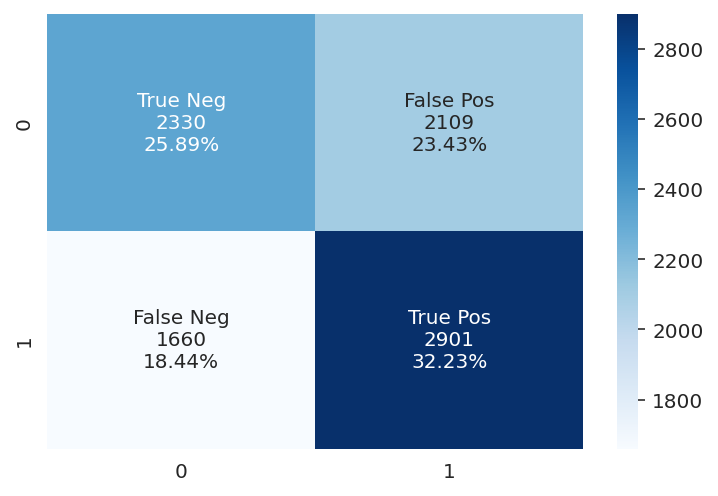

In [ ]:
confusion_matrix3 = metrics.confusion_matrix(y3_train_lr,pred_train_lr3)#cofusion matrex
print(confusion_matrix3)
#plot_confusion_matrix(pipe_gridsearch, x3_train, y3_train) 
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix3.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix3.flatten()/np.sum(confusion_matrix3)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix3, annot=labels, fmt='', cmap='Blues')

In [ ]:
print(classification_report(y3_train_lr,pred_train_lr3))

              precision    recall  f1-score   support

           0       0.58      0.52      0.55      4439
           1       0.58      0.64      0.61      4561

    accuracy                           0.58      9000
   macro avg       0.58      0.58      0.58      9000
weighted avg       0.58      0.58      0.58      9000



In [244]:
preba3_lr=lr3pipe_gridsearch.predict_proba(x3_test_lr)
score3_lr=lr3pipe_gridsearch.score(x3_test_lr, y3_test_lr)
print(cl("Logistic_Regression Test",color='red',attrs = ['bold']), score3_lr.round(3))

Logistic_Regression Test 0.594


In [243]:
lr_a3 = roc_auc_score(pred_test_lr3,y3_test_lr)
print(cl('roc_auc_score is:',color='red',attrs=['bold']), round(lr_a3*100,2))

roc_auc_score is: 59.61


In [ ]:
test_1r3=y3_test_lr.copy()
test_1r3['prediction']=pred_test_lr3

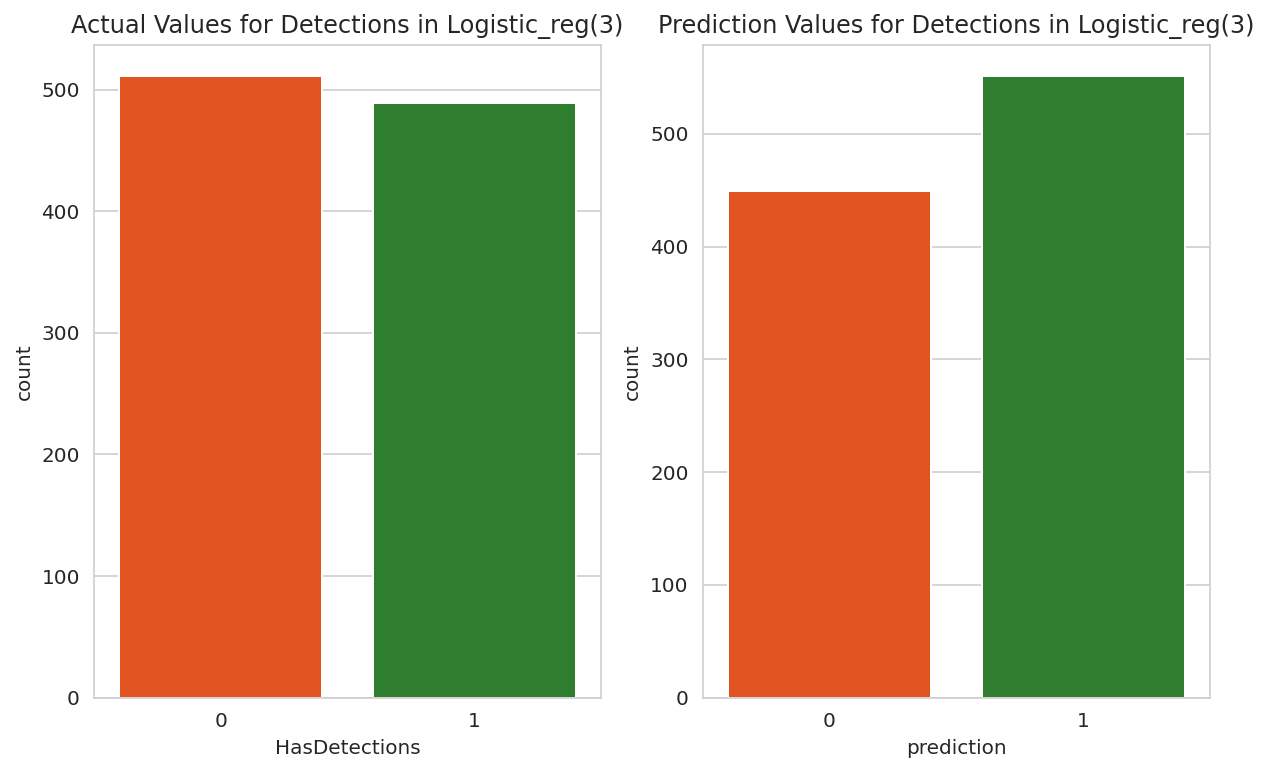

In [252]:
#plot the true and prediction
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 6))

sns.countplot(x=test_1r3['HasDetections'], data=test_1r3,palette=['orangered',"forestgreen"],ax=ax[0])
ax[0].set_title('Actual Values for Detections in Logistic_reg(3)')
sns.countplot(x=test_1r3['prediction'], data=test_1r3,palette=['orangered',"forestgreen"], ax=ax[1])
ax[1].set_title('Prediction Values for Detections in Logistic_reg(3)')


plt.show()

#### - After applying Logistic Regression on the three methods, the best score was in the second method 'SelectKBest' which gave a '0.599' score. I will complete other models on second and features 

## 2- KNeighborsClassifier Model




####  A) SelectKBest Features


In [ ]:
X2_knn=df_[featureScores_2['best_features']]# assign the features to X2
y2_knn=df_[['HasDetections']]#target

In [ ]:
x2_train_knn, x2_test_knn, y2_train_knn, y2_test_knn = train_test_split(X2_knn, y2_knn ,test_size=0.1, random_state=0)#Do split

In [ ]:
# Instantiate pipeline object.
Knn2_pipe = Pipeline([('standardscaler', StandardScaler()),#did standerisation to scale the value of features
                     ('kbest', SelectKBest()),
                     ('Classifier',  KNeighborsClassifier())])

In [ ]:
# Define dictionary of hyperparameters.
Knn2_parameters = {
                 'standardscaler__with_std': [True, False],
                'standardscaler__with_mean': [True, False],
    'kbest__k':  list(range(1, x2_train_knn.shape[1]+1)),#use differnt number of Kbest 
              'Classifier__n_neighbors': list(range(1,15))}# use differnt number of neighbors from 1-21

In [ ]:
# Instantiate our GridSearchCV object.
Knn2pipe_grid = GridSearchCV(Knn2_pipe, Knn2_parameters, cv=5, scoring="accuracy")# set grid_search

Knn2pipe_grid.fit(x2_train_knn, y2_train_knn)# did fit for train_data with knn model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kbest', SelectKBest()),
                                       ('Classifier', KNeighborsClassifier())]),
             param_grid={'Classifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14],
                         'kbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'standardscaler__with_mean': [True, False],
                         'standardscaler__with_std': [True, False]},
             scoring='accuracy')

In [ ]:
Knn2pipe_grid.get_params()#show the parameter that applied 

{'cv': 5,
 'error_score': nan,
 'estimator': Pipeline(steps=[('standardscaler', StandardScaler()), ('kbest', SelectKBest()),
                 ('Classifier', KNeighborsClassifier())]),
 'estimator__Classifier': KNeighborsClassifier(),
 'estimator__Classifier__algorithm': 'auto',
 'estimator__Classifier__leaf_size': 30,
 'estimator__Classifier__metric': 'minkowski',
 'estimator__Classifier__metric_params': None,
 'estimator__Classifier__n_jobs': None,
 'estimator__Classifier__n_neighbors': 5,
 'estimator__Classifier__p': 2,
 'estimator__Classifier__weights': 'uniform',
 'estimator__kbest': SelectKBest(),
 'estimator__kbest__k': 10,
 'estimator__kbest__score_func': <function sklearn.feature_selection._univariate_selection.f_classif>,
 'estimator__memory': None,
 'estimator__standardscaler': StandardScaler(),
 'estimator__standardscaler__copy': True,
 'estimator__standardscaler__with_mean': True,
 'estimator__standardscaler__with_std': True,
 'estimator__steps': [('standardscaler', Standar

In [ ]:
# Print out best estimator.
Knn2pipe_grid.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler(with_std=False)),
                ('kbest', SelectKBest()),
                ('Classifier', KNeighborsClassifier(n_neighbors=6))])

In [242]:
knn2_score=Knn2pipe_grid.score(x2_train_knn, y2_train_knn)# the score of train_data
print(cl('pipe_grid_knn score in train= ',color='red',attrs = ['bold']),knn2_score.round(3))

pipe_grid_knn score in train=  0.558


In [ ]:
#do the prediction for both train and test data
knn2_pred_train = Knn2pipe_grid.predict(x2_train_knn)
knn2_pred_test=Knn2pipe_grid.predict(x2_test_knn)

[[3409 1030]
 [2948 1613]]


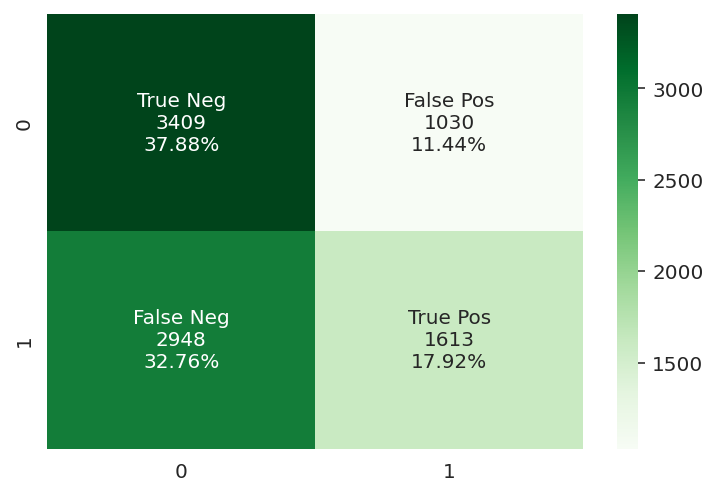

In [ ]:
confusion_matrix2_knn = metrics.confusion_matrix(y2_train_knn,knn2_pred_train)#cofusion matrex
print(confusion_matrix2_knn)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix2_knn.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix2_knn.flatten()/np.sum(confusion_matrix2_knn)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix2_knn, annot=labels, fmt='', cmap='Greens')

In [241]:


preba_knn2=Knn2pipe_grid.predict_proba(x2_test_knn)#calculate the probability
score_test_Knn2=Knn2pipe_grid.score(x2_test_knn, y2_test_knn)#calculate the score
print(cl("{} {} Score: ".format("KNeighborsClassifier", "Test"),color='red',attrs = ['bold']), score_test_Knn2.round(3))

KNeighborsClassifier Test Score:  0.556


In [240]:
knn_a2 = roc_auc_score(knn2_pred_test,y2_test_knn)#percentage of score
print(cl('roc_auc_score is:',color='red',attrs=['bold']), round(knn_a2*100,2))

roc_auc_score is: 56.25


In [ ]:
test_knn2=y2_test_knn.copy()# create dataframe to show the result
test_knn2['prediction']=knn2_pred_test


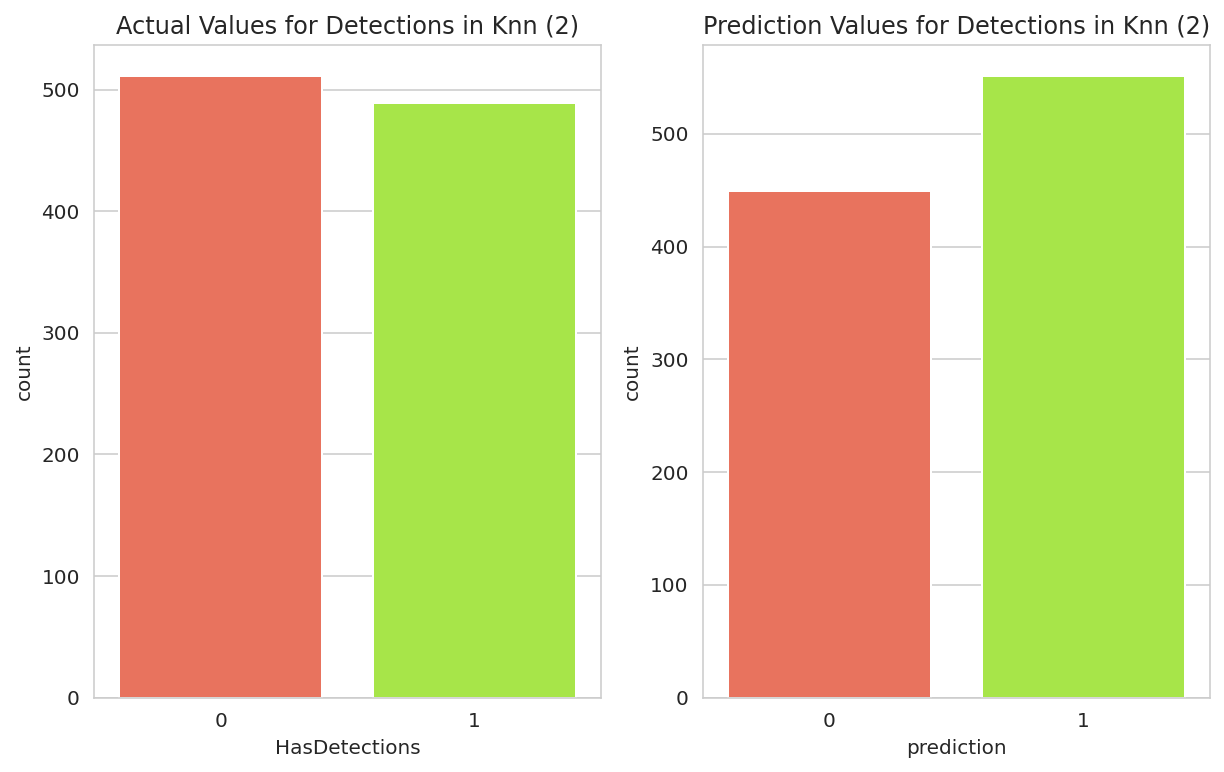

In [ ]:
#plot the true and prediction
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 6))

sns.countplot(x=test_1r3['HasDetections'], data=test_1r3,palette=['tomato',"greenyellow"],ax=ax[0])
ax[0].set_title('Actual Values for Detections in Knn (2)')
sns.countplot(x=test_1r3['prediction'], data=test_1r3,palette=['tomato',"greenyellow"], ax=ax[1])
ax[1].set_title('Prediction Values for Detections in Knn (2)')


plt.show()


#### B) Random_Forest  Features




In [ ]:
X3_knn=df_[RF_Importances.index]
y3_knn=df_[['HasDetections']]

In [ ]:
x3_train_knn, x3_test_knn, y3_train_knn, y3_test_knn = train_test_split(X3_knn, y3_knn ,test_size=0.1, random_state=0)

In [ ]:
# Instantiate pipeline object.
# we applied the same strategy for all models that used 
pipeline_knn3 = Pipeline([('standardscaler', StandardScaler()),#did standerisation to scale the value of features
                     ('kbest', SelectKBest()),
                     ('Classifier',  KNeighborsClassifier())])## using KNeighborsClassifier model


In [ ]:

parameters_knn3 = {
                 'standardscaler__with_std': [True, False],
                'standardscaler__with_mean': [True, False],
    'kbest__k':  list(range(1, x3_train_knn.shape[1]+1)),#use differnt number of Kbest from 1-11
              'Classifier__n_neighbors': list(range(1,15))}# use differnt number of neighbors from 1-21

In [ ]:
pipe_grid_knn3 = GridSearchCV(pipeline_knn3, parameters_knn3, cv=5, scoring="accuracy")# set grid_search

pipe_grid_knn3.fit(x3_train_knn, y3_train_knn)# did fit for train_data with knn model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kbest', SelectKBest()),
                                       ('Classifier', KNeighborsClassifier())]),
             param_grid={'Classifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14],
                         'kbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'standardscaler__with_mean': [True, False],
                         'standardscaler__with_std': [True, False]},
             scoring='accuracy')

In [ ]:
pipe_grid_knn3.get_params()#show the parameter that applied 

{'cv': 5,
 'error_score': nan,
 'estimator': Pipeline(steps=[('standardscaler', StandardScaler()), ('kbest', SelectKBest()),
                 ('Classifier', KNeighborsClassifier())]),
 'estimator__Classifier': KNeighborsClassifier(),
 'estimator__Classifier__algorithm': 'auto',
 'estimator__Classifier__leaf_size': 30,
 'estimator__Classifier__metric': 'minkowski',
 'estimator__Classifier__metric_params': None,
 'estimator__Classifier__n_jobs': None,
 'estimator__Classifier__n_neighbors': 5,
 'estimator__Classifier__p': 2,
 'estimator__Classifier__weights': 'uniform',
 'estimator__kbest': SelectKBest(),
 'estimator__kbest__k': 10,
 'estimator__kbest__score_func': <function sklearn.feature_selection._univariate_selection.f_classif>,
 'estimator__memory': None,
 'estimator__standardscaler': StandardScaler(),
 'estimator__standardscaler__copy': True,
 'estimator__standardscaler__with_mean': True,
 'estimator__standardscaler__with_std': True,
 'estimator__steps': [('standardscaler', Standar

In [ ]:
# Print out best estimator.
pipe_grid_knn3.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()), ('kbest', SelectKBest()),
                ('Classifier', KNeighborsClassifier(n_neighbors=13))])

In [239]:
knn_score3=pipe_grid_knn3.score(x3_train_knn, y3_train_knn)# the score of train_data
print(cl('knn score in train= ',color='red',attrs = ['bold']),knn_score3)

knn score in train=  0.6375555555555555


In [ ]:
#do the prediction for both train and test data y3_train, y3_test
knn_pred_train3 = pipe_grid_knn3.predict(x3_train_knn)
knn_pred_test3=pipe_grid_knn3.predict(x3_test_knn)

[[3409 1030]
 [2948 1613]]


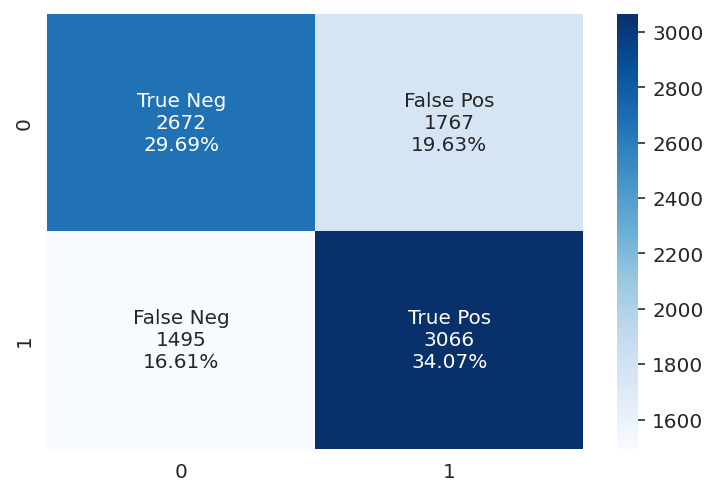

In [ ]:
confusion_matrix3_knn = metrics.confusion_matrix(y3_train_knn,knn_pred_train3)#cofusion matrex
print(confusion_matrix3_knn)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix3_knn.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix3_knn.flatten()/np.sum(confusion_matrix3_knn)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix3_knn, annot=labels, fmt='', cmap='Blues')

In [238]:
preba3=pipe_grid_knn3.predict_proba(x3_test_knn)# calculate the probability
score3=pipe_grid_knn3.score(x3_test_knn, y3_test_knn)#calculate the score
print(cl("{} {} Score: ".format("KNeighborsClassifier", "Test"),color='red',attrs = ['bold']), score3.round(3))

KNeighborsClassifier Test Score:  0.571


In [237]:
knn_a3 = roc_auc_score(knn_pred_test3,y3_test_knn)
print(cl('roc_auc_score is:',color='red',attrs=['bold']), round(knn_a3*100,2))# calculate the percantage of accuracy

roc_auc_score is: 57.13


In [ ]:
test_knn3=y3_test_knn.copy()# save the result in dataframe to plot it
test_knn3['prediction']=knn_pred_test3


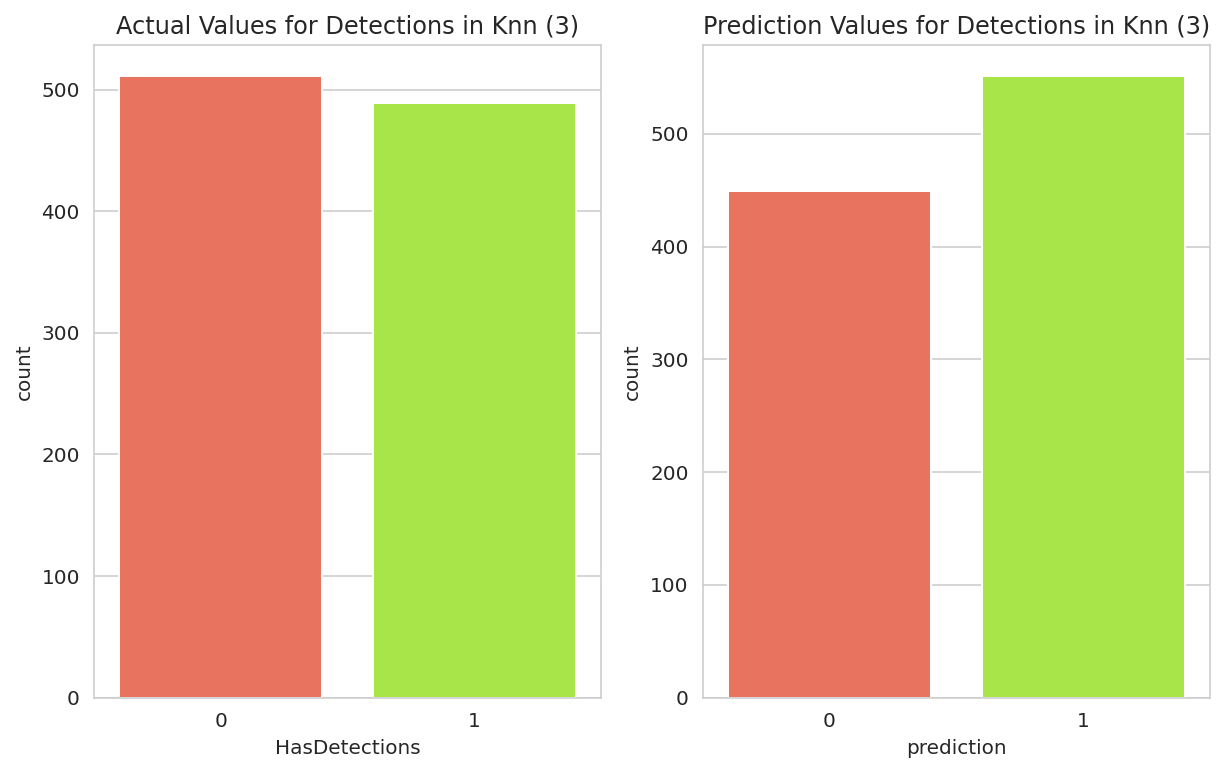

In [ ]:
#plot the true and prediction
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 6))

sns.countplot(x=test_1r3['HasDetections'], data=test_1r3,palette=['tomato',"greenyellow"],ax=ax[0])
ax[0].set_title('Actual Values for Detections in Knn (3)')
sns.countplot(x=test_1r3['prediction'], data=test_1r3,palette=['tomato',"greenyellow"], ax=ax[1])
ax[1].set_title('Prediction Values for Detections in Knn (3)')


plt.show()


In [ ]:

#comparison_column = np.where(y3_test_1['HasDetections'] == y3_test_1['prediction'], 'True_Prediction', 'False_Prediction')
#y3_test_1["T/F_Predictions"] = comparison_column
#y3_test_1['T/F_Predictions'].value_counts().plot(kind='bar', color=['green','red'],
 #                                                title='Prediction of Fardom_forest Model',fontsize=16,
  #                                               )

#### In KNeighborsClassifier model, Random_forest features gave better score than SelectKBest Features


## 3-Random Forest Classifier

####  A) SelectKBest Features

In [ ]:
X2_rf=df_[featureScores_2['best_features']]# assign the features to X2
y2_rf=df_[['HasDetections']]

In [ ]:
x2_train_rf, x2_test_rf, y2_train_rf, y2_test_rf = train_test_split(X2_rf, y2_rf ,test_size=0.1, random_state=0)#Do split

In [ ]:
rf2_pipe = Pipeline([('sscaler', StandardScaler()),('randomForest', RandomForestClassifier())])
#inisalize StandardScaler() and Random Forest Classifier in Pipeline

In [ ]:
# Define dictionary of hyperparameters.
rf2pipe_params = {'sscaler__with_mean': [True, False], 
                 'sscaler__with_std': [True, False],
                'randomForest__max_features':[2, 3, 5, 7, 8,9],
                'randomForest__max_depth': [1, 2, 3, 4, 5, 8],
                'randomForest__bootstrap':[True, False]}

In [ ]:
rf2pipe_gridsearch = GridSearchCV(rf2_pipe, # What is the model we want to fit?
                                 rf2pipe_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 verbose=1)

In [ ]:
rf2pipe_gridsearch.fit(x2_train_rf, y2_train_rf);# do fit for train_data

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


In [ ]:
rf2pipe_gridsearch.best_estimator_ # show the best estimator parameter that used in fit

Pipeline(steps=[('sscaler', StandardScaler()),
                ('randomForest',
                 RandomForestClassifier(bootstrap=False, max_depth=8,
                                        max_features=9))])

In [236]:
print(cl('The score with GridSearch :',color='red',attrs = ['bold']), round(rf2pipe_gridsearch.score(x2_train_rf, y2_train_rf),2))#show the score of train-data
print('The best parameters :',rf2pipe_gridsearch.best_params_)#print the best parameter

The score with GridSearch : 0.59
The best parameters : {'randomForest__bootstrap': False, 'randomForest__max_depth': 8, 'randomForest__max_features': 9, 'sscaler__with_mean': True, 'sscaler__with_std': True}


In [ ]:
#prediction for the best model in pred_dt_best on Train data
train_pred_rf2=rf2pipe_gridsearch.predict(x2_train_rf)
#prediction for the best model in pred_dt_best on Test data
test_pred_rf2= rf2pipe_gridsearch.predict(x2_test_rf)

[[1971 2468]
 [1250 3311]]


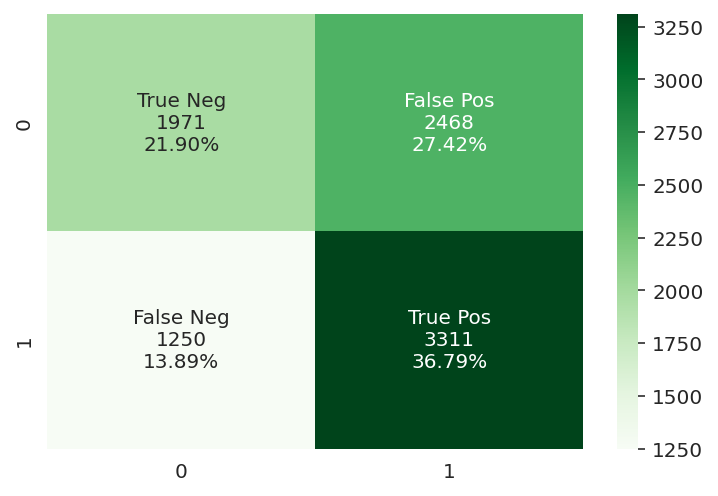

In [195]:

confusion_matrix2_rf = metrics.confusion_matrix(y2_train_rf,train_pred_rf2)#cofusion matrex
print(confusion_matrix2_rf)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix2_rf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix2_rf.flatten()/np.sum(confusion_matrix2_rf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix2_rf, annot=labels, fmt='', cmap='Greens')

In [235]:
print(cl('The score of X_test : ',color='red',attrs = ['bold']), rf2pipe_gridsearch.score(x2_test_rf, y2_test_rf))#show the score of train-data

The score of X_test :  0.607


In [234]:
rf_a2 = roc_auc_score(test_pred_rf2,y2_test_rf)#calculate the precentage of accuracy
print(cl('roc_auc_score is:',color='red',attrs=['bold']), round(rf_a2*100,2))

roc_auc_score is: 62.23


In [198]:
test_rf2=y2_test_rf.copy()#save the result in dataframe to plot it
test_rf2['prediction']=test_pred_rf2
test_rf2.head(1)

,HasDetections,prediction
9394,0,1


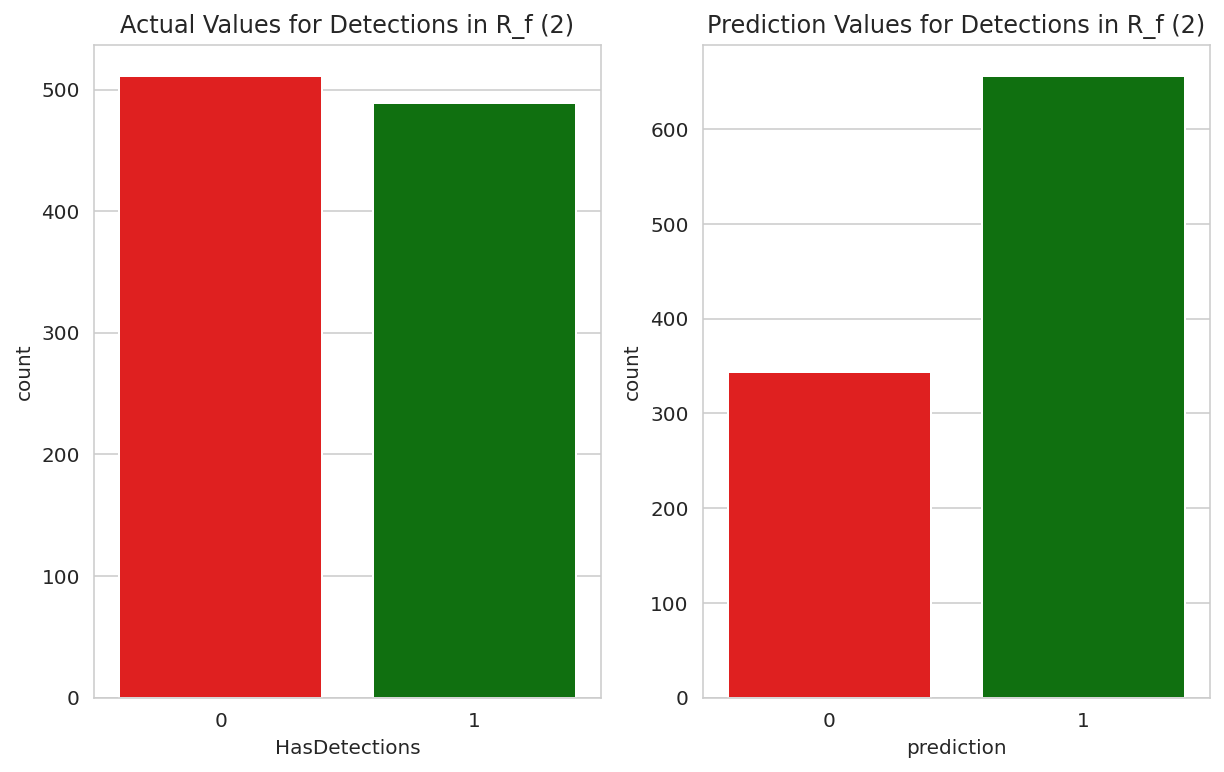

In [199]:
#plot the true and prediction
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 6))

sns.countplot(x=test_rf2['HasDetections'], data=test_1r3,palette=['red',"g"],ax=ax[0])
ax[0].set_title('Actual Values for Detections in R_f (2)')
sns.countplot(x=test_rf2['prediction'], data=test_1r3,palette=['red',"g"], ax=ax[1])
ax[1].set_title('Prediction Values for Detections in R_f (2)')


plt.show()

#### B) Random_Forest  Features

In [182]:
X3_rf=df_[RF_Importances.index]#assign features
y3_rf=df_[['HasDetections']]#target
x3_train_rf, x3_test_rf, y3_train_rf, y3_test_rf = train_test_split(X3_rf, y3_rf ,test_size=0.1, random_state=0)#Do split

In [183]:
rf_pipe3 = Pipeline([('sscaler', StandardScaler()),('randomForest', RandomForestClassifier())])
#inisalize StandardScaler() and Random Forest Classifier in Pipeline

In [184]:
# Define dictionary of hyperparameters.
rfpipe3_params = {'sscaler__with_mean': [True, False], 
                 'sscaler__with_std': [True, False],
                'randomForest__max_features':[2, 3, 5, 7, 8,9],
                'randomForest__max_depth': [1, 2, 3, 4, 5, 8],
                'randomForest__bootstrap':[True, False]}

In [185]:
rfpipe3_gridsearch = GridSearchCV(rf_pipe3, # What is the model we want to fit?
                                 rfpipe3_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 verbose=0)

In [186]:
rfpipe3_gridsearch.fit(x3_train_rf, y3_train_rf);# do fit for train_data

In [187]:
rfpipe3_gridsearch.best_estimator_ # show the best estimator parameter that used in fit

Pipeline(steps=[('sscaler', StandardScaler(with_mean=False, with_std=False)),
                ('randomForest',
                 RandomForestClassifier(max_depth=5, max_features=2))])

In [188]:
print(cl('The score with GridSearch :',attrs = ['bold']), rfpipe3_gridsearch.score(x3_train_rf, y3_train_rf))#show the score of train-data
print('The best parameters :',rfpipe3_gridsearch.best_params_)#print the best parameter

The score with GridSearch : 0.601
The best parameters : {'randomForest__bootstrap': True, 'randomForest__max_depth': 5, 'randomForest__max_features': 2, 'sscaler__with_mean': False, 'sscaler__with_std': False}


In [189]:

#prediction for the best model in pred_dt_best on Train data
train_pred_rf3=rfpipe3_gridsearch.predict(x3_train_rf)
#prediction for the best model in pred_dt_best on Test data
test_pred_rf3= rfpipe3_gridsearch.predict(x3_test_rf)

[[2349 2090]
 [1501 3060]]


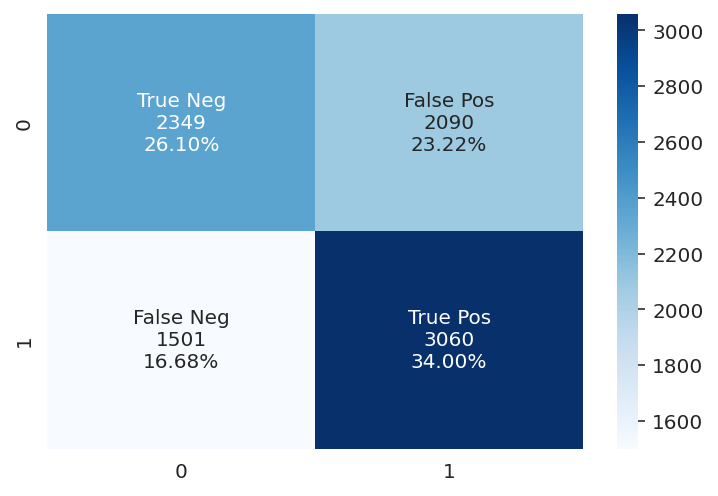

In [194]:
confusion_matrix3_rf = metrics.confusion_matrix(y3_train_rf,train_pred_rf3)#cofusion matrex
print(confusion_matrix3_rf)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix3_rf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix3_rf.flatten()/np.sum(confusion_matrix3_rf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix3_rf, annot=labels, fmt='', cmap='Blues')

In [233]:
print(cl('The score of X_test : ',color='red',attrs = ['bold']), rfpipe3_gridsearch.score(x3_test_rf, y3_test_rf))#show the score of train-data

The score of X_test :  0.597


In [232]:
rf_a3 = roc_auc_score(test_pred_rf3,y3_test_rf)#calculate the percentage
print(cl('roc_auc_score is:',color='red',attrs=['bold']), round(rf_a3*100,2))

roc_auc_score is: 60.05


In [192]:

test_rf3=y3_test_rf.copy()# save the result in dataframe to plot it
test_rf3['prediction']=test_pred_rf3
test_rf3.head(1)

,HasDetections,prediction
9394,0,1


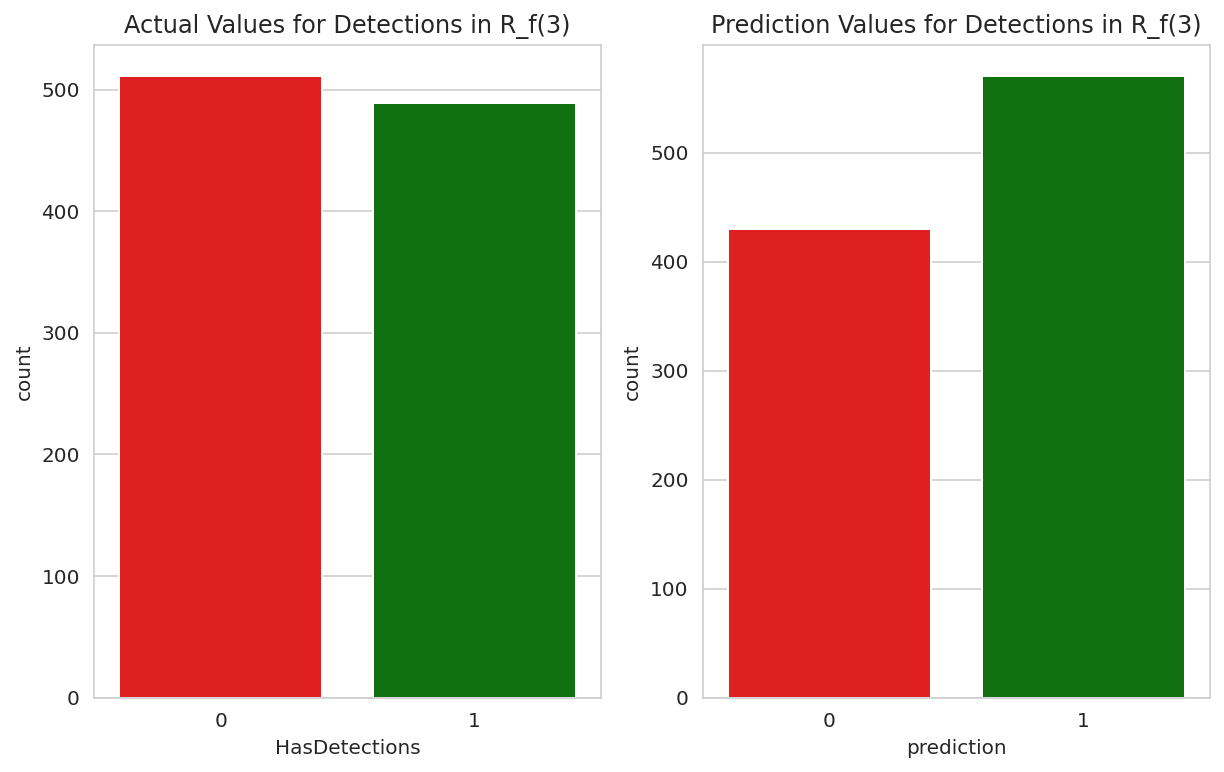

In [193]:
#plot the true and prediction
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 6))

sns.countplot(x=test_rf3['HasDetections'], data=test_1r3,palette=['red',"g"],ax=ax[0])
ax[0].set_title('Actual Values for Detections in R_f(3)')
sns.countplot(x=test_rf3['prediction'], data=test_1r3,palette=['red',"g"], ax=ax[1])
ax[1].set_title('Prediction Values for Detections in R_f(3)')


plt.show()

## 4- PCA with Random Forest Classifier

#### - Ok, lets try using all features with PCA technique then apply on them Random_Forest model that gave best score 

In [200]:

X_PCA, y_PCA = df_.drop(columns=['HasDetections'],axis=1), df_[['HasDetections']]#define all features in X_ and target=y
X_pca=StandardScaler().fit_transform(X_PCA)#make scaling first on the features
pca = PCA(n_components=6)# define the number of components
X_Components = pca.fit_transform(X_pca)# do fit and transform
pca_df = pd.DataFrame(data = X_Components # create dataframe that contain the results
             , columns = ['component_1', 'component_2','component_3',
                          'component_4','component_5','component_6'])
X_PCA=pca_df# assign to X
y_PCA=df_['HasDetections']#target

In [201]:
x_train_Prf, x_test_Prf, y_train_Prf, y_test_Prf = train_test_split(X_PCA, y_PCA ,test_size=0.1, random_state=0)#make split 90% train , 10% test

In [202]:
#define prameters
n_estimators = [100, 50, 200]
max_depth = [5, 8, 15, 25]
min_samples_split = [2, 5, 10, 15, 20]
min_samples_leaf = [1, 2, 5, 10] 
forestVC = RandomForestClassifier(random_state = 1)#define the model
hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forestVC, hyperF, cv = 3, verbose = 0, # use gridSearch to select best parameter
                      n_jobs = -1)
bestF = gridF.fit(x_train_Prf, y_train_Prf)# do fit


In [203]:
bestF

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [5, 8, 15, 25],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 20],
                         'n_estimators': [100, 50, 200]})

In [231]:
print(cl('The score of train :',color='red',attrs = ['bold']), gridF.score(x_train_Prf, y_train_Prf))#show the score of train-data


The score of train : 0.666


In [210]:
y_pred_Prf = bestF.predict(x_test_Prf)
y_pred_Prf_train=bestF.predict(x_train_Prf)
print(cl("Test score is: ",color='red',attrs=['bold']),round(bestF.score(x_test_Prf, y_test_Prf),2))


Test score is:  0.54


[[2325 2114]
 [ 892 3669]]


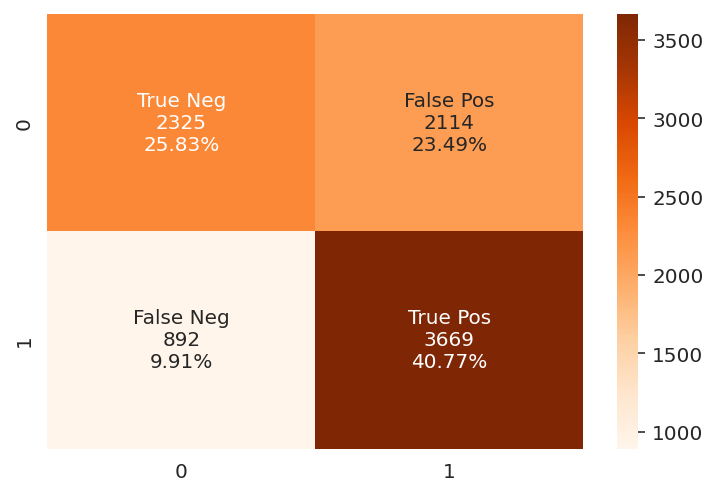

In [211]:
confusion_matrix_rf_PCA = metrics.confusion_matrix(y_train_Prf,y_pred_Prf_train)#cofusion matrex
print(confusion_matrix_rf_PCA)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix_rf_PCA.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix_rf_PCA.flatten()/np.sum(confusion_matrix_rf_PCA)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix_rf_PCA, annot=labels, fmt='', cmap='Oranges')

In [230]:
Prf_a3 = roc_auc_score(y_pred_Prf,y_test_Prf)#calculate the percentage
print(cl('roc_auc_score is:',color='red',attrs=['bold']), round(Prf_a3*100,2))

roc_auc_score is: 54.21


In [205]:
y_PCA_rf=y_test_Prf.to_frame()#create dataframe that contains true and prediction values
y_PCA_rf['prediction']=y_pred_Prf 

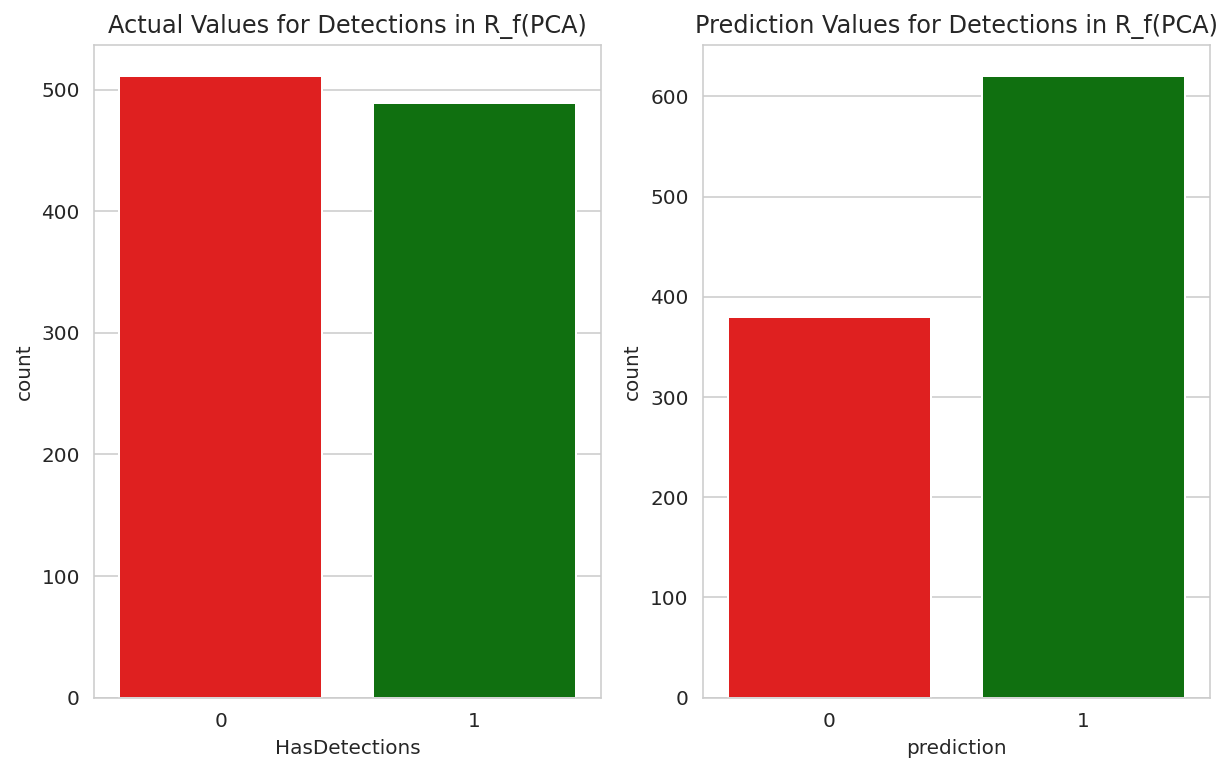

In [206]:
#plot the true and prediction
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 6))

sns.countplot(x=y_PCA_rf['HasDetections'], data=test_1r3,palette=['red',"g"],ax=ax[0])
ax[0].set_title('Actual Values for Detections in R_f(PCA)')
sns.countplot(x=y_PCA_rf['prediction'], data=test_1r3,palette=['red',"g"], ax=ax[1])
ax[1].set_title('Prediction Values for Detections in R_f(PCA)')


plt.show()

#### - Random Forest classifier model gives the best score with SelectKBest Features




#### - You can observe that using SelectKBest Features method gave the best score in most previous models, so I will use those features to apply Neural Network model

## 5- Neural_Network Model

#### - Now, I will apply Neual_Network on the features that gave best score with model which is 'SelectKBest'

In [212]:
X2_nn=df_[featureScores_2['best_features']]# assign the features to X2
y2_nn=df_[['HasDetections']]# define target

In [213]:
sc = MinMaxScaler()# define scale
X2_nn = sc.fit_transform(X2_nn)#scale features


In [214]:
y2_nn = df_['HasDetections'].values # save target in array format

In [215]:

print("[INFO] constructing training/testing split...")# split data 90% train and 10% test
(x2_train_nn, x2_test_nn, y2_train_nn, y2_test_nn) = train_test_split(
	X2_nn, y2_nn, test_size=0.1, random_state=42)

[INFO] constructing training/testing split...


In [216]:
# define the architecture of the network
model = Sequential()
model.add(Dense(10, input_dim=10, activation='relu'))#input layer input_dim has to match No. of Features!!!
model.add(Dense(8, activation='relu'))#Hidden Layer 1
model.add(Dense(5, activation='relu'))#Hidder Layer 2
model.add(Dense(1, activation='sigmoid'))#Output Layer --> Output has to match the number of categories in target!!!!

In [217]:
# train the model using SGD
print("[INFO] compiling model...")
model.compile(loss="binary_crossentropy", optimizer='sgd',
	metrics=["accuracy"])
model.fit(x2_train_nn, y2_train_nn, epochs=100, batch_size=90,
	verbose=0)

[INFO] compiling model...


In [227]:
train2_predict_nn = (model.predict(x2_train_nn) > 0.5).astype("int32")#calculate the prediction and save it in list

a2_nn_train = roc_auc_score(train2_predict_nn,y2_train_nn)
print(cl("NN Train roc_auc_score is: ",color='red',attrs=['bold']),a2_nn_train)

NN Train roc_auc_score is:  0.5900129575752112


In [228]:
test2_predict_nn = (model.predict(x2_test_nn) > 0.5).astype("int32")#calculate the prediction and save it in list

In [229]:

a2_nn = roc_auc_score(test2_predict_nn,y2_test_nn)
print(cl("NN Test roc_auc_score is: ",color='red',attrs=['bold']),a2_nn)

NN Test roc_auc_score is:  0.5975469503509024


In [220]:

# show the accuracy on the testing set
print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(x2_test_nn, y2_test_nn,
	batch_size=128, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,round(
	accuracy * 100,2)))


Evaluating on testing set...
loss=0.6723, accuracy: 59.3000%


In [221]:

y2_NN = pd.DataFrame(y2_test_nn,columns=['HasDetections'])# save the result to plot it
y2_NN['prediction']=test2_predict_nn

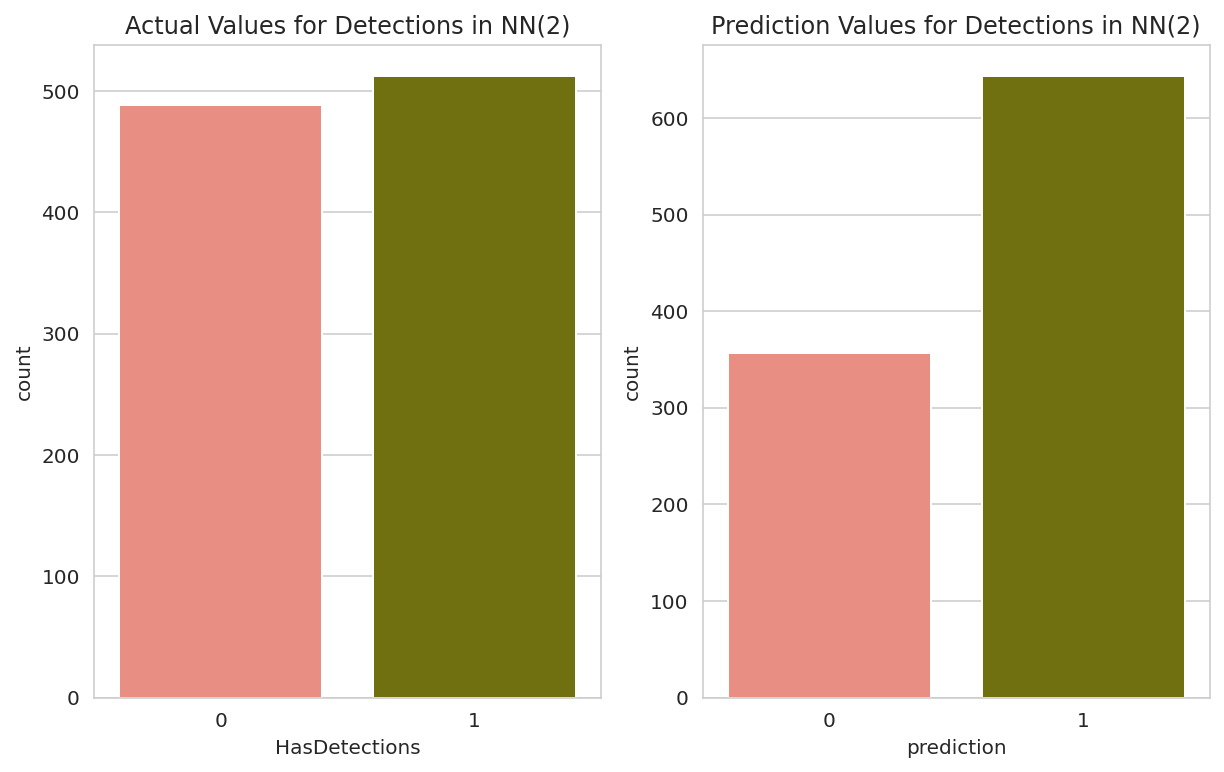

In [253]:
#plot the true and prediction
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 6))

sns.countplot(x=y2_NN['HasDetections'], data=test_1r3,palette=['salmon',"olive"],ax=ax[0])
ax[0].set_title('Actual Values for Detections in NN(2)')
sns.countplot(x=y2_NN['prediction'], data=test_1r3,palette=['salmon',"olive"], ax=ax[1])
ax[1].set_title('Prediction Values for Detections in NN(2)')


plt.show()

## Result and Conclusion:
▶ All models give nearly the same range of scores <p>
▶ Random Forest classifier model was the best model among the other three <p>
▶ The score still not very good, maybe need to use other techniques to improve working models, using another model or using other features<p>
▶ some time the test score was better than the train score a little bit; this result makes me confident that no overfitting in the model. Also, because the change is small, so, I am not worried about that, my model is under fitting.




